Universidad del valle de Guatemala  
Dpto. Ciencias de la computacion  
Inteligencia Artificial  
Alberto Suriano  

Proyecto Final de curso  
Andres Quinto - 18288  
Marlon Hernández - 15177  

[Repositorio_aqui](https://github.com/AndresQuinto5/Proyecto_IA.git)

Este proyecto final consiste en la implementación o profundización teórica de un tema relacionado con la Inteligencia Artificial. El objetivo es desarrollar un programa que resuelva un problema real y de interés, aplicando las técnicas y conocimientos adquiridos durante el curso.

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [133]:
'''
Cargamos el dataset
'''
data = pd.read_csv('dataset.csv')
students_df_cleaned = pd.read_csv('dataset.csv')

          Student status  Percentage
Target                              
Graduate            2209     0.60854
Dropout             1421     0.39146
(3630, 35)


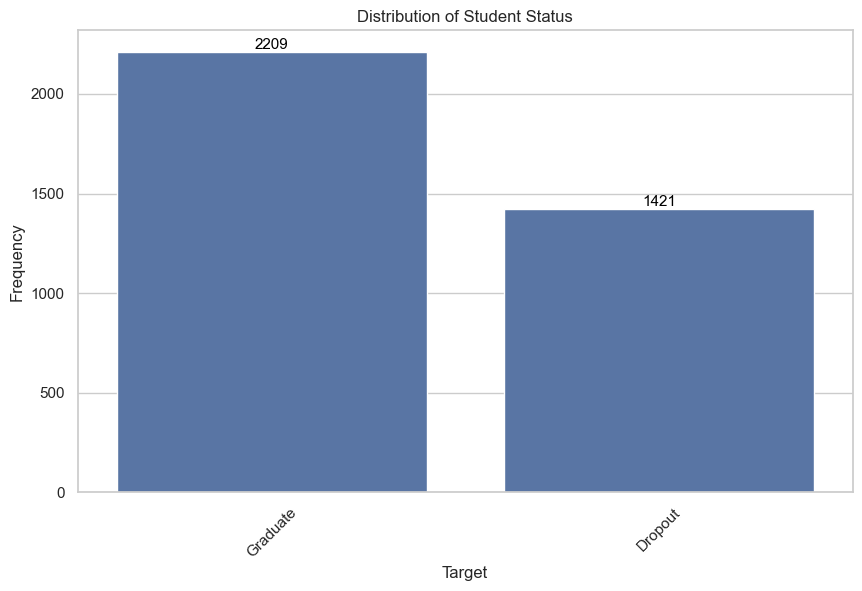

In [134]:
'''
Exploramos el dataset
Importamos el dataset y quitamos las observaciones de 'Enrolled'
El dataset contiene 3630 observaciones con 34 caraterísticas y una variable a predecir
'''
# Ver las primeras filas del dataset
# print(data.head())
# Importamos el dataset y quitamos las observaciones de 'Enrolled'
# El dataset contiene 3630 observaciones con 34 caraterísticas y una variable a predecir
data = data.drop(data[data.Target == "Enrolled"].index)
res = data.Target.value_counts().to_frame('Student status')
res['Percentage'] = res['Student status'] / res['Student status'].sum()

print(res)
print(data.shape)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Target', data=data, order=data['Target'].value_counts().index)
plt.title('Distribution of Student Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [135]:
# Obtener información general del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                           

In [136]:
# Obtener estadísticas descriptivas del dataset
print(data.describe())

       Marital status  Application mode  Application order       Course  \
count     3630.000000       3630.000000        3630.000000  3630.000000   
mean         1.184298          6.810193           1.750138     9.935537   
std          0.613009          5.253618           1.333831     4.340715   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    11.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           6.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 3630.000000             3630.000000  3630.000000   
mean                     0.887603                2.552617     1.242424   
std                      0.315897                3.952440     1.700394   
min                      0.0

In [137]:
# Verificar valores faltantes por columna
print(data.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

<Axes: xlabel='Age at enrollment', ylabel='Count'>

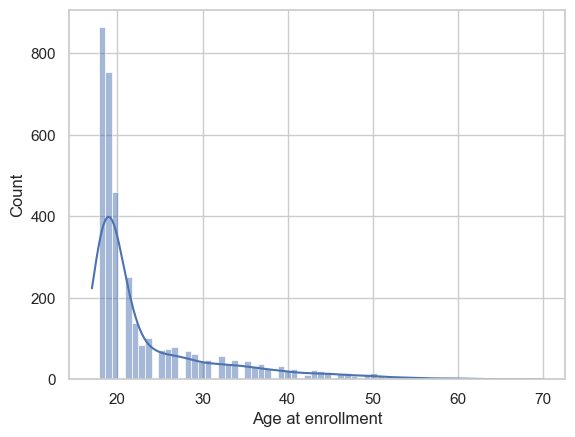

In [138]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=data['Age at enrollment'], kde=True)

In [139]:
'''Renombrar aquellas columnas que presentan apostrofe'''

data = data.rename(columns={"Mother's qualification": "Mother_qualification", 
                            "Father's qualification": "Father_qualification",
                            "Mother's occupation": "Mother_occupation",
                            "Father's occupation": "Father_occupation"})

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64


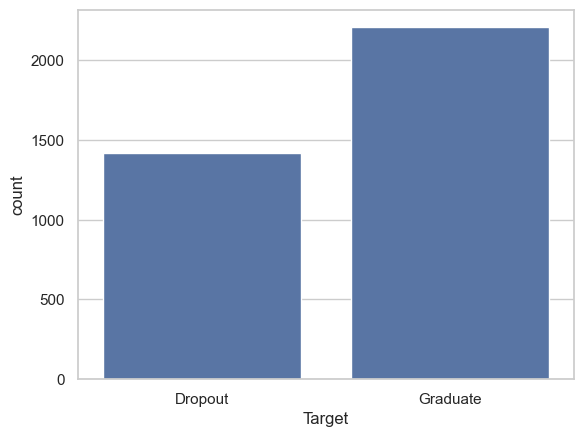

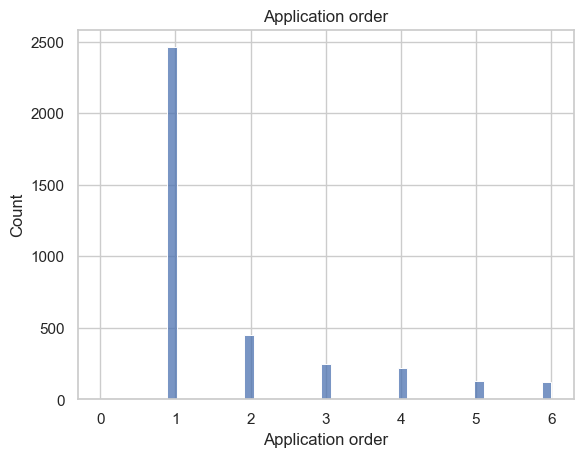

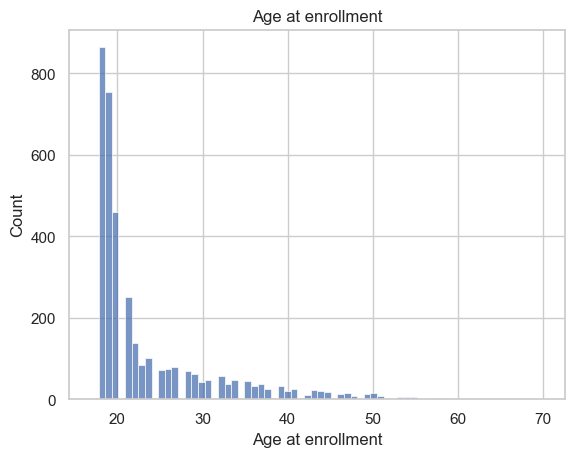

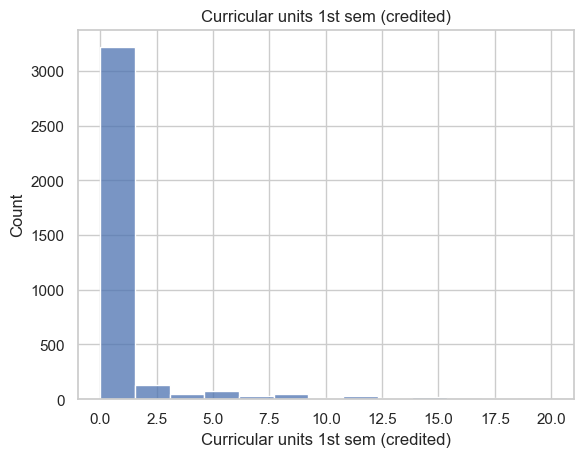

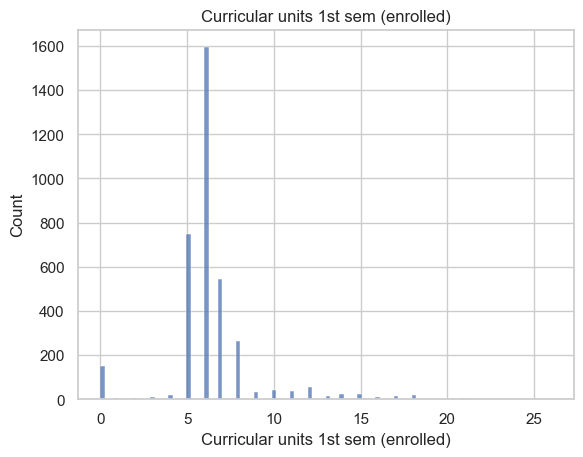

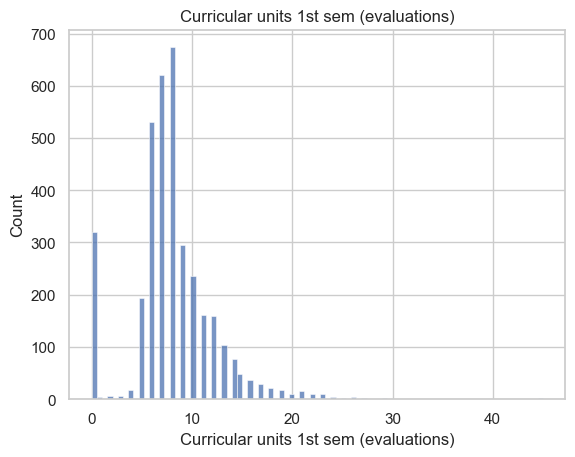

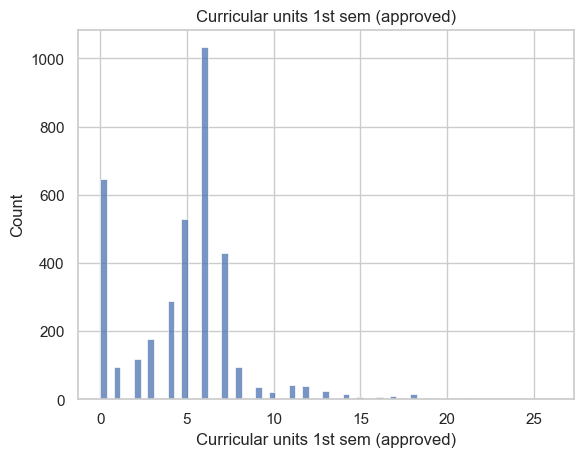

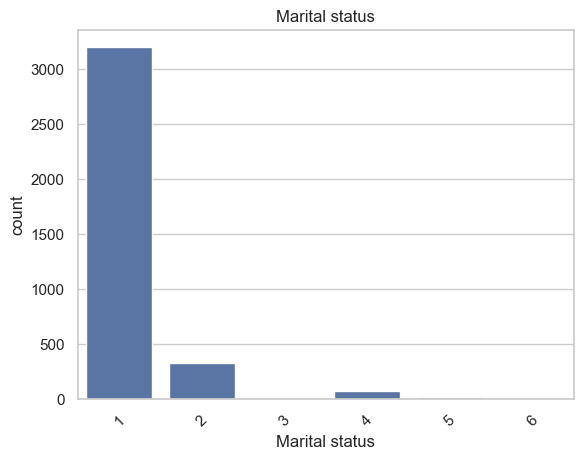

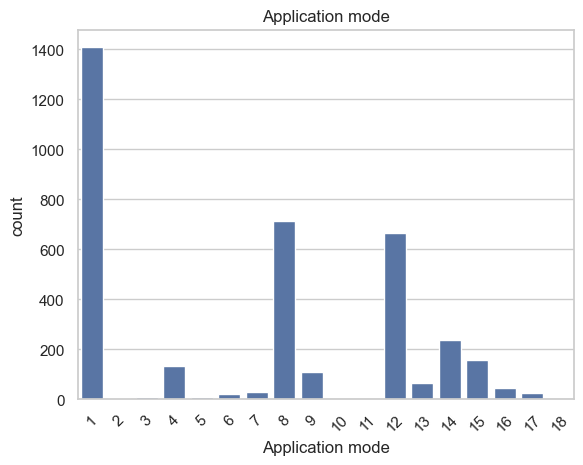

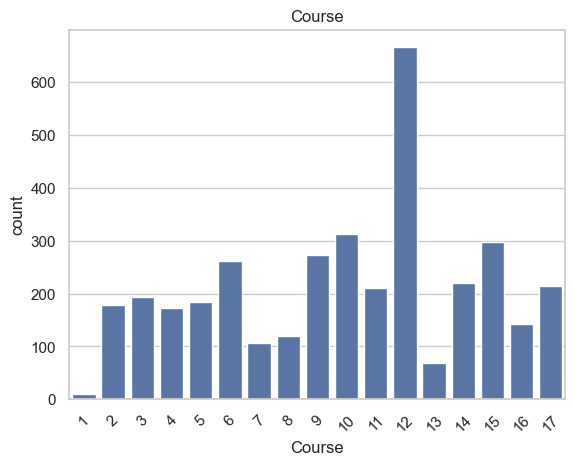

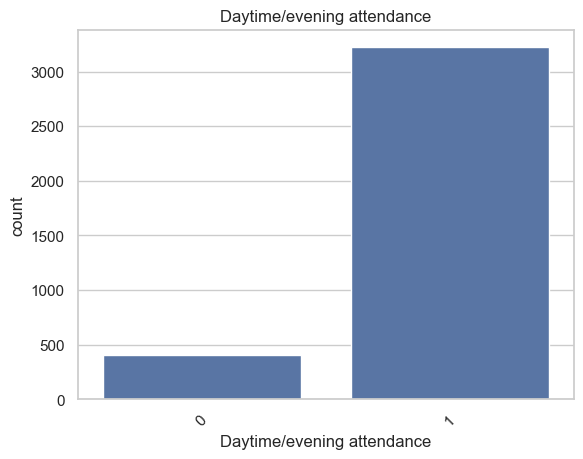

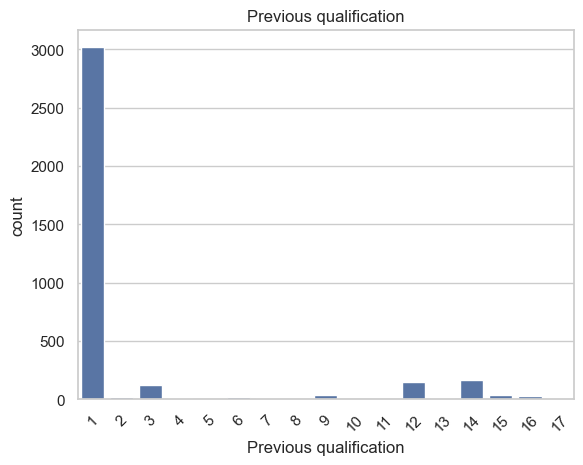

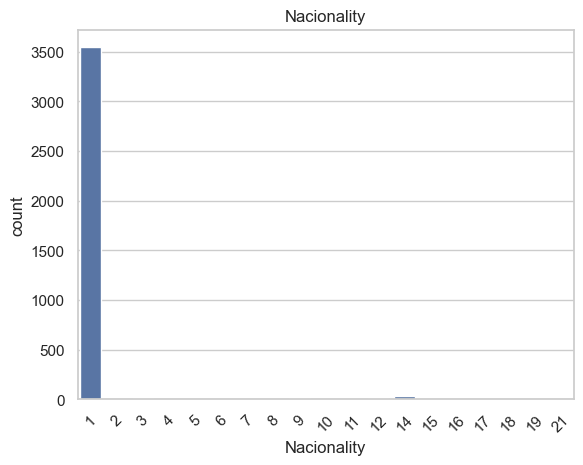

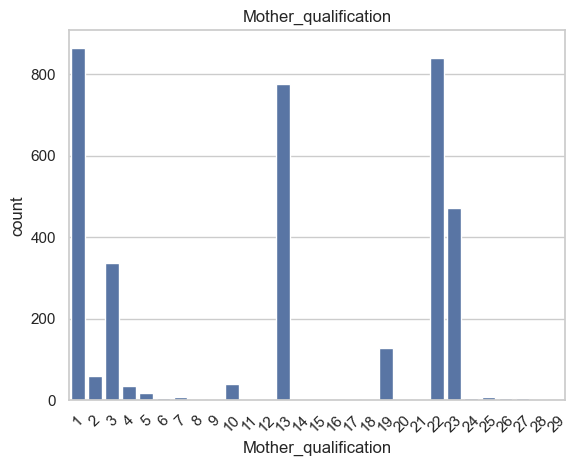

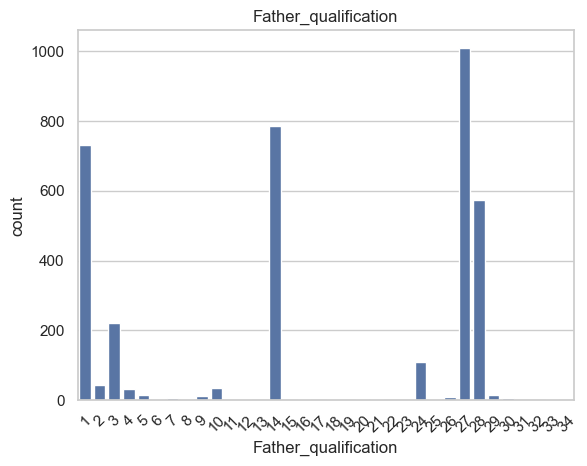

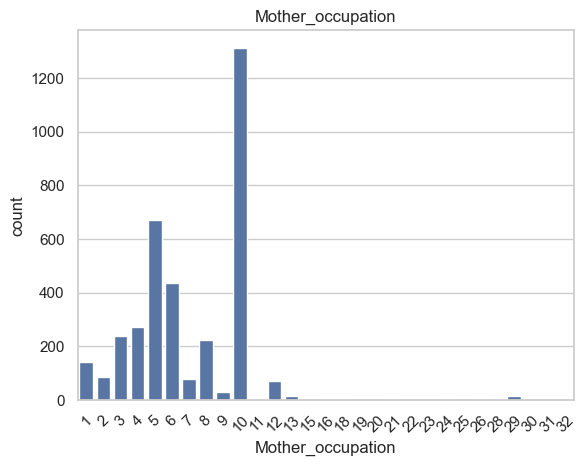

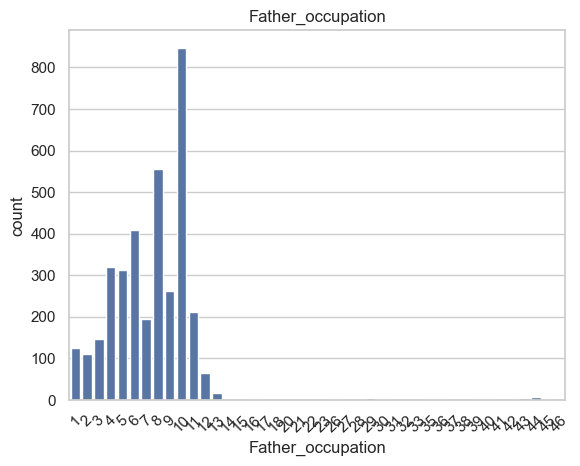

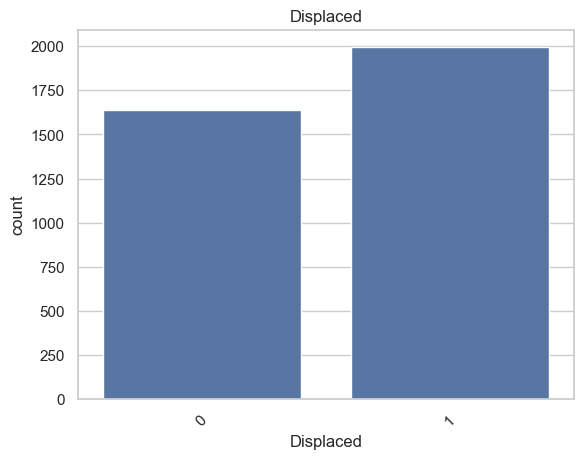

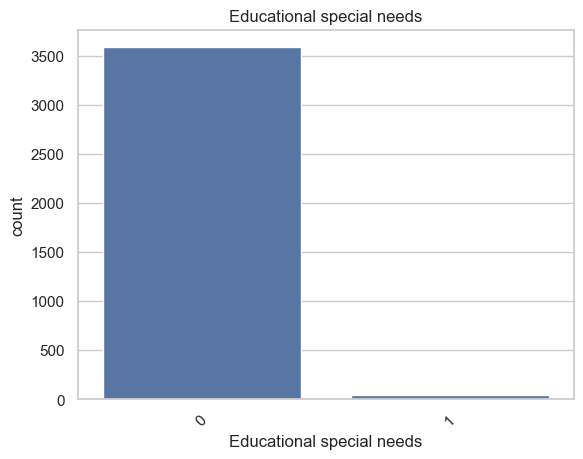

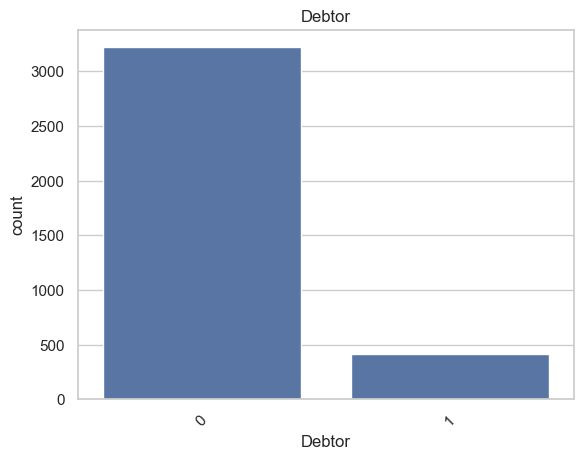

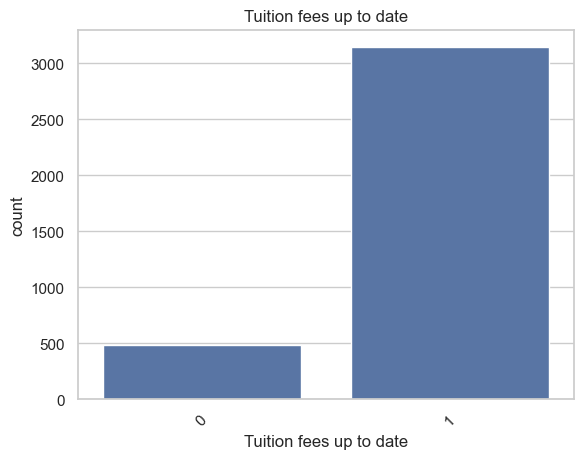

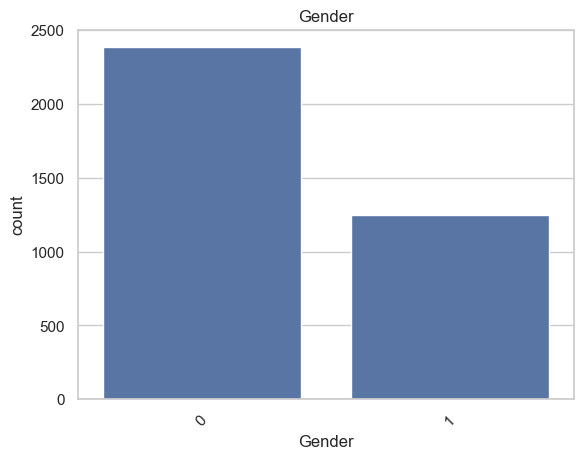

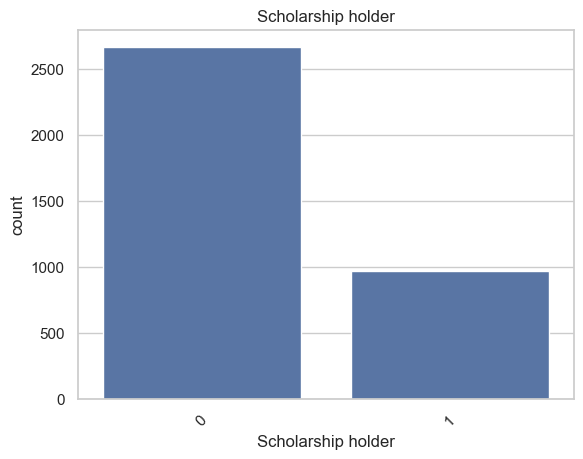

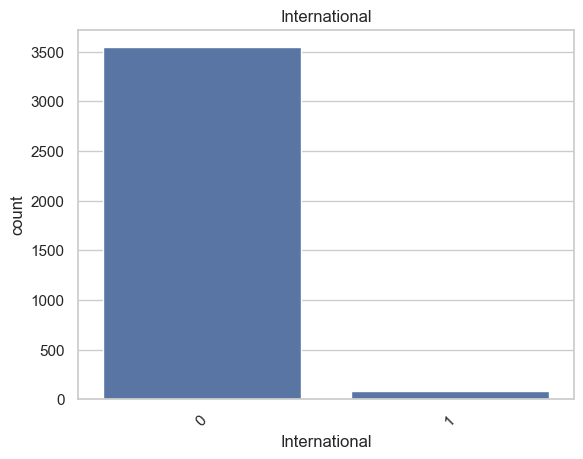

In [140]:
# Distribución de la variable objetivo
print(data['Target'].value_counts())

# Gráfico de barras de la variable objetivo
sns.countplot(x='Target', data=data)
plt.show()

# Gráficos de distribución para variables numéricas
num_cols = ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)']
for col in num_cols:
    plt.figure()
    sns.histplot(data[col])
    plt.title(col)
    plt.show()

# Gráficos de barras para variables categóricas
cat_cols = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Mother_qualification', 'Father_qualification', 'Mother_occupation', 'Father_occupation', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=data)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

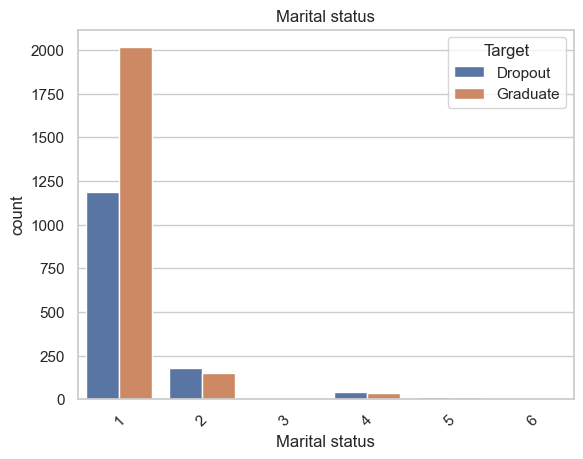

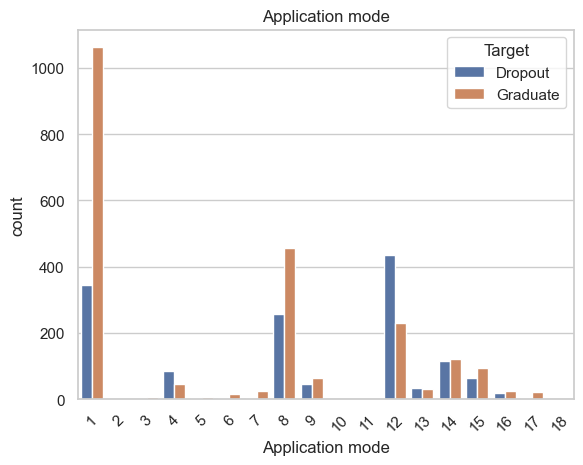

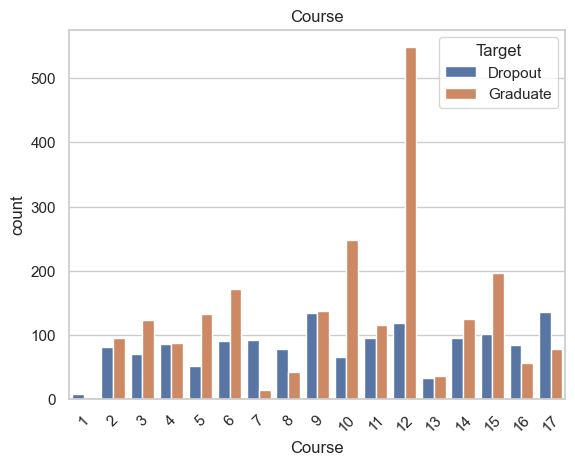

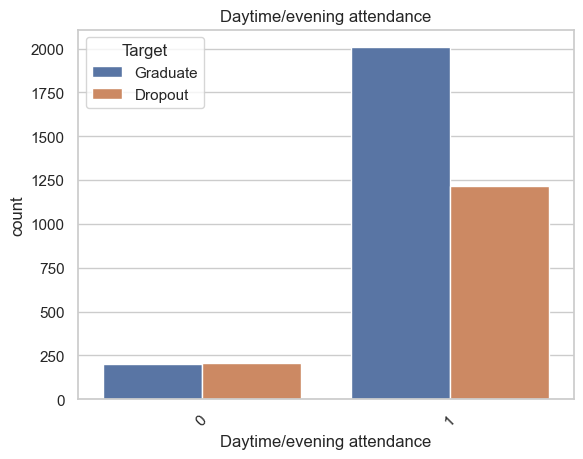

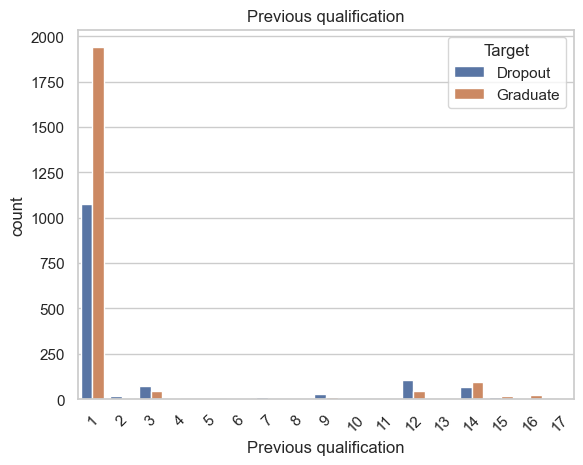

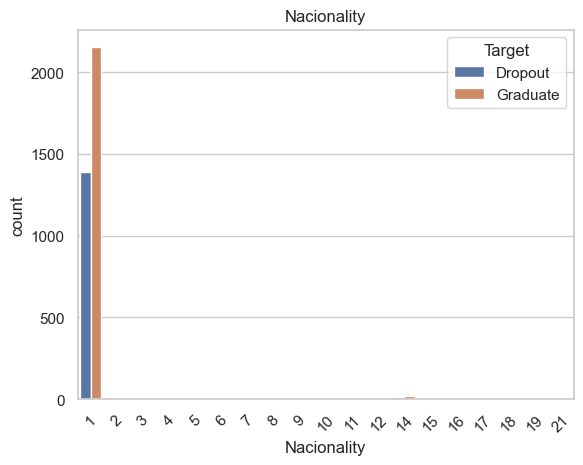

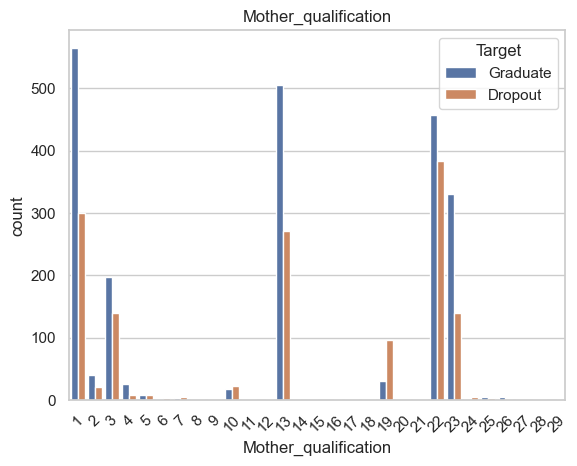

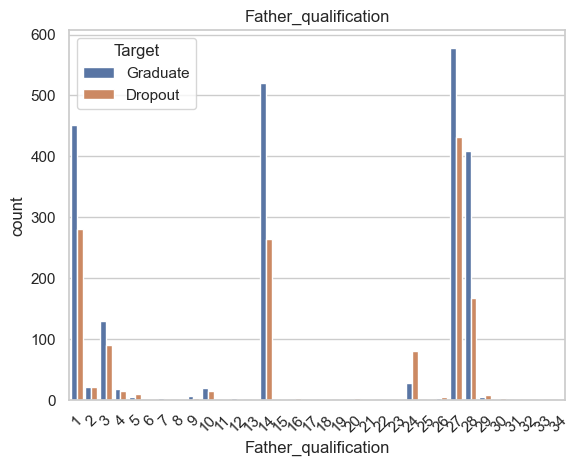

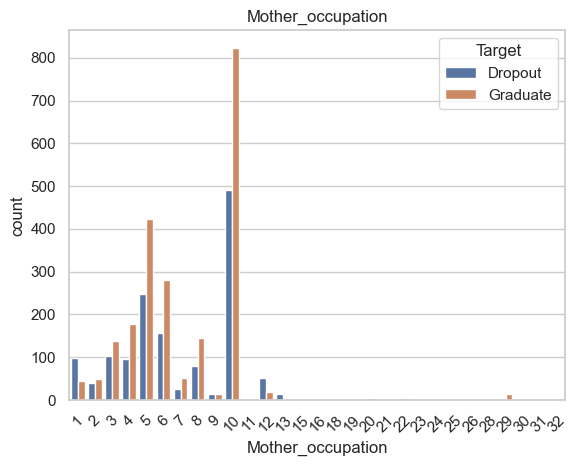

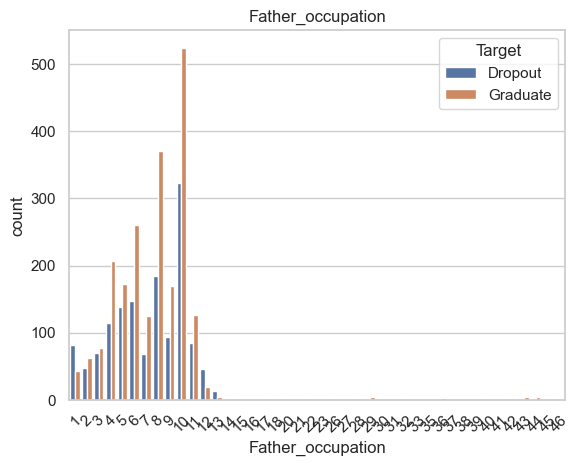

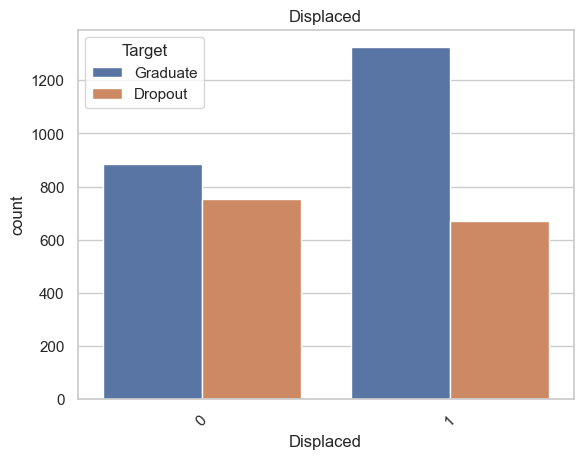

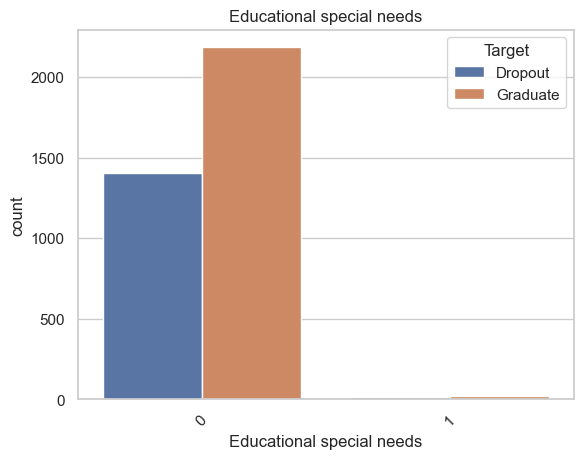

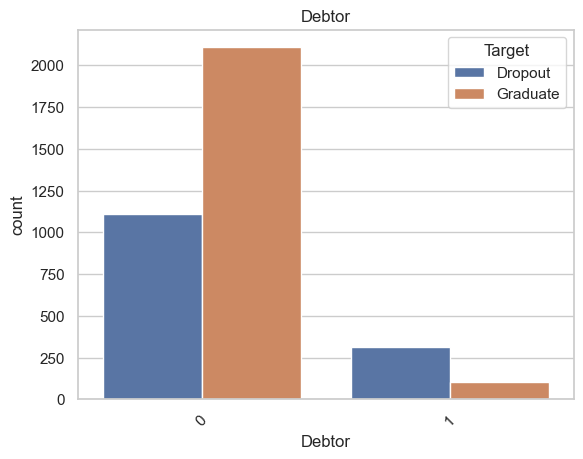

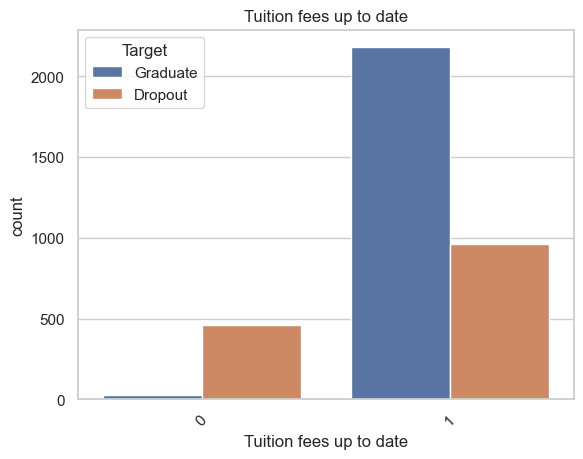

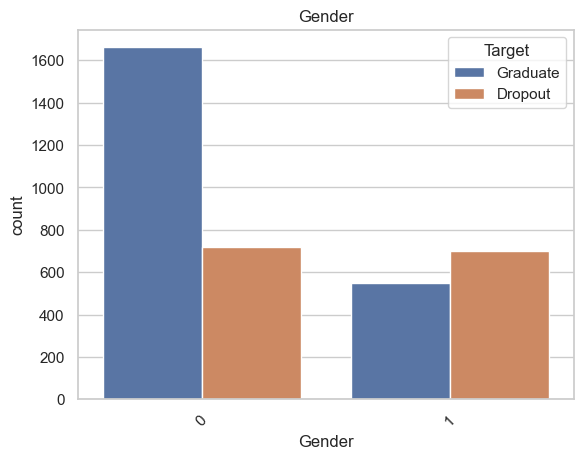

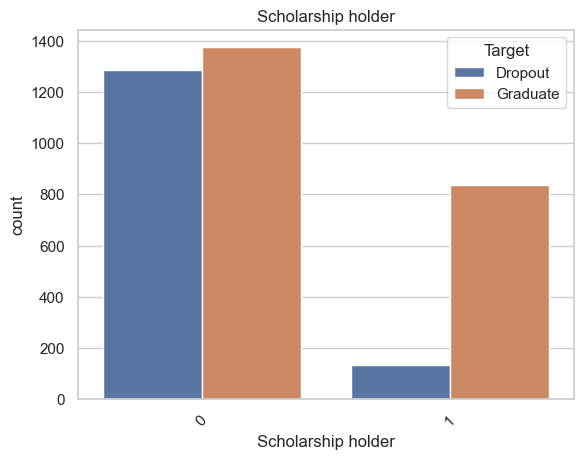

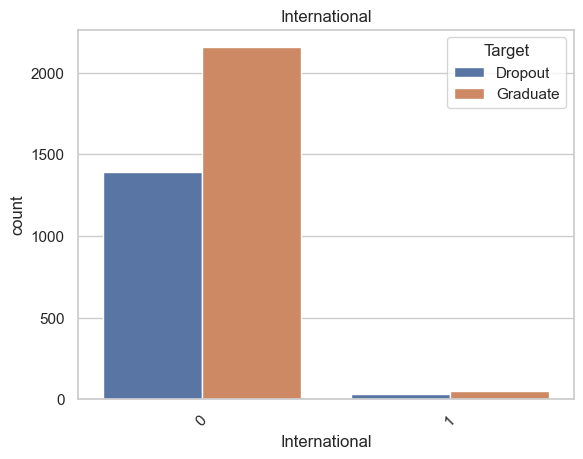

In [141]:
# Relación entre variables numéricas y la variable objetivo
# for col in num_cols:
#     plt.figure()
#     sns.boxplot(x='Target', y=col, data=data)
#     plt.title(col)
#     plt.show()

# Relación entre variables categóricas y la variable objetivo
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue='Target', data=data)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

In [142]:
# Importamos el dataset y quitamos las observaciones de 'Enrolled'
# El dataset contiene 3630 observaciones con 34 caraterísticas y una variable a predecir
df = pd.read_csv('dataset.csv')
df = df.drop(df[df.Target == "Enrolled"].index)
res = df.Target.value_counts().to_frame('Student status')
res['Percentage'] = res['Student status'] / res['Student status'].sum()

print(res)
df.shape


          Student status  Percentage
Target                              
Graduate            2209     0.60854
Dropout             1421     0.39146


(3630, 35)

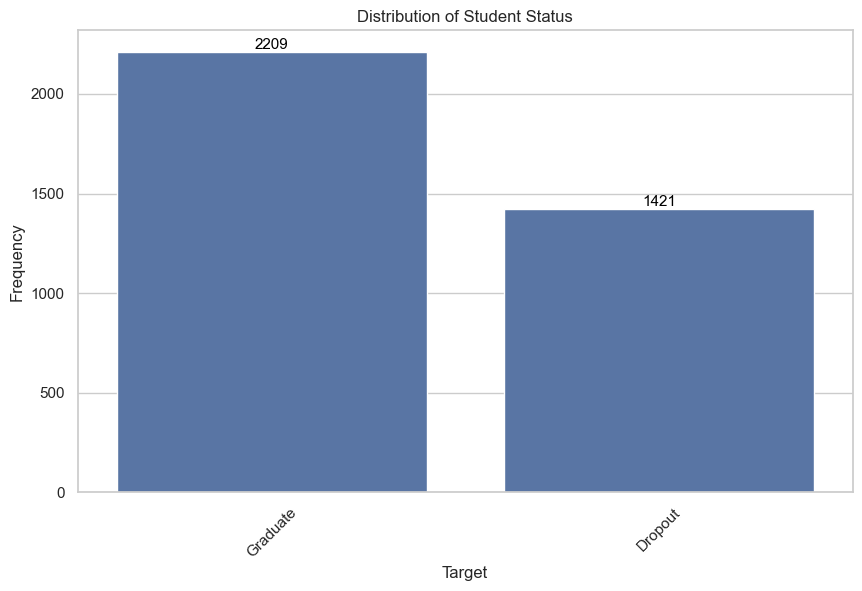

In [143]:
data = df
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Target', data=data, order=data['Target'].value_counts().index)
plt.title('Distribution of Student Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Datos Demográficos


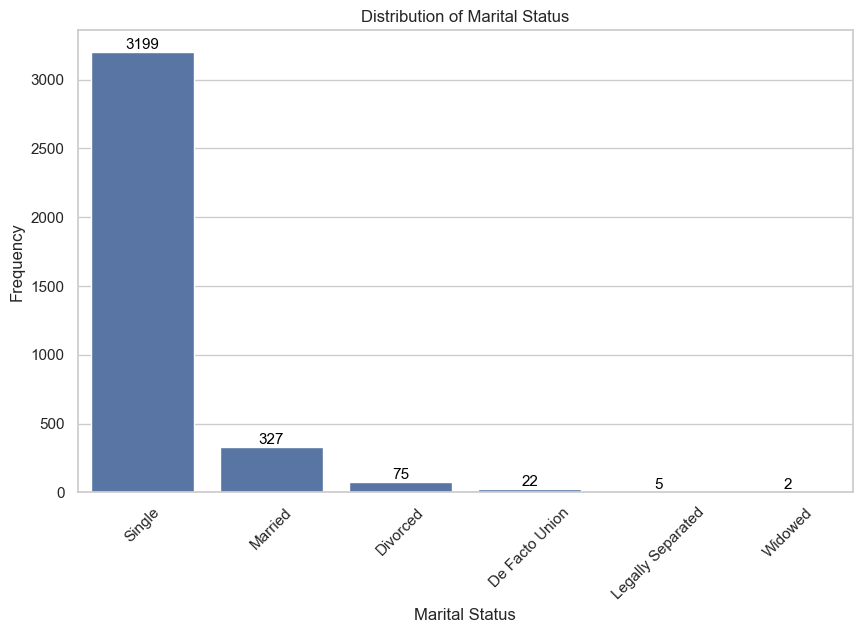

In [144]:
data['Marital status'] = df['Marital status'].map({
    1: 'Single',
    2: 'Married',
    3: 'Widowed',
    4: 'Divorced',
    5: 'De Facto Union',
    6: 'Legally Separated'
})

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Marital status', data=data, order=data['Marital status'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [145]:
data = df
data['Application mode'] = df['Application mode'].map({
    1: '1st phase—general contingent',
    2: 'Ordinance No. 612/93',
    3: '1st phase—special contingent (Azores Island)',
    4: 'Holders of other higher courses',
    5: 'Ordinance No. 854-B/99',
    6: 'International student (bachelor)',
    7: '1st phase—special contingent (Madeira Island)',
    8: '2nd phase—general contingent',
    9: '3rd phase—general contingent',
    10: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    11: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    12: 'Over 23 years old',
    13: 'Transfer',
    14: 'Change in course',
    15: 'Technological specialization diploma holders',
    16: 'Change in institution/course',
    17: 'Short cycle diploma holders',
    18: 'Change in institution/course (International)'
})


data = data['Application mode'].value_counts().reset_index()
data.columns = ['Application Mode', 'Count']
data

Application Mode  Count
0                        1st phase—general contingent   1408
1                        2nd phase—general contingent    713
2                                   Over 23 years old    664
3                                    Change in course    237
4        Technological specialization diploma holders    157
5                     Holders of other higher courses    132
6                        3rd phase—general contingent    108
7                                            Transfer     66
8                        Change in institution/course     46
9       1st phase—special contingent (Madeira Island)     30
10                        Short cycle diploma holders     25
11                   International student (bachelor)     20
12                             Ordinance No. 854-B/99     10
13       1st phase—special contingent (Azores Island)      8
14                               Ordinance No. 612/93      3
15       Change in institution/course (International)      1
16  Ordinance No. 533-A/99, item b2) (Different Plan)      1
17  Ordinance No. 533-A/99, item b3 (Other Institu...      1

In [146]:
data = df['Application order'].value_counts().reset_index()
data.columns = ['Application order', 'Count']
data

Application order  Count
0                  1   2461
1                  2    451
2                  3    249
3                  4    218
4                  5    129
5                  6    121
6                  0      1

                                  Course  Count
0                                Nursing    666
1                         Social Service    313
2           Journalism and Communication    297
3                             Management    272
4                     Veterinary Nursing    262
5   Advertising and Marketing Management    220
6        Management (evening attendance)    214
7                                Tourism    211
8    Social Service (evening attendance)    194
9                   Communication Design    184
10       Animation and Multimedia Design    178
11                              Agronomy    173
12                       Basic Education    142
13                         Equiniculture    120
14               Informatics Engineering    106
15                          Oral Hygiene     69
16       Biofuel Production Technologies      9


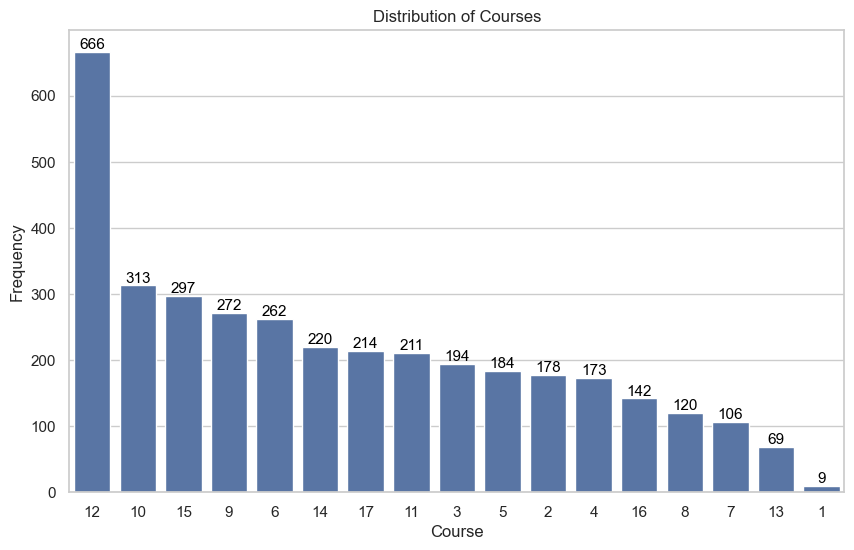

In [147]:
data = df['Course'].value_counts().reset_index()
data.columns = ['Course', 'Count']
data['Course'] = data['Course'].map({
    1: 'Biofuel Production Technologies',
    2: 'Animation and Multimedia Design',
    3: 'Social Service (evening attendance)',
    4: 'Agronomy',
    5: 'Communication Design',
    6: 'Veterinary Nursing',
    7: 'Informatics Engineering',
    8: 'Equiniculture',
    9: 'Management',
    10: 'Social Service',
    11: 'Tourism',
    12: 'Nursing',
    13: 'Oral Hygiene',
    14: 'Advertising and Marketing Management',
    15: 'Journalism and Communication',
    16: 'Basic Education',
    17: 'Management (evening attendance)'
})
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Course', data=df, order=df['Course'].value_counts().index)
plt.title('Distribution of Courses')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


  Daytime/evening attendance  Count
0         Daytime attendance   3222
1         Evening attendance    408


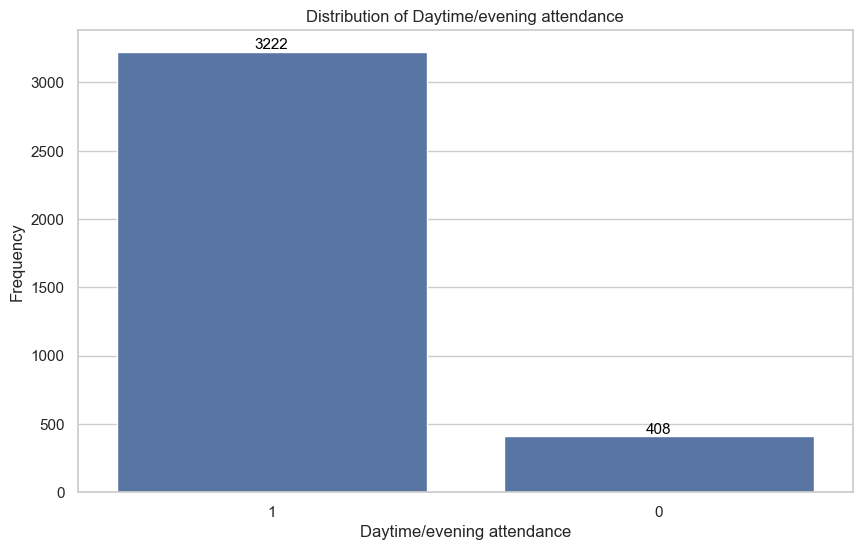

In [148]:
data = df['Daytime/evening attendance'].value_counts().reset_index()
data.columns = ['Daytime/evening attendance', 'Count']
data['Daytime/evening attendance'] = data['Daytime/evening attendance'].map({
    0: 'Evening attendance',
    1: 'Daytime attendance'
})
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Daytime/evening attendance', data=df, order=df['Daytime/evening attendance'].value_counts().index)
plt.title('Distribution of Daytime/evening attendance')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

                               Previous qualification  Count
0                                 Secondary education   3019
1                 Technological specialization course    164
2   Basic education 3rd cycle (9th/10th/11th year)...    149
3                             Higher education—degree    122
4                        Other—11th year of schooling     39
5                 Higher education—degree (1st cycle)     34
6                Professional higher technical course     28
7                  Higher education—bachelor’s degree     22
8                       Frequency of higher education     15
9                12th year of schooling—not completed     11
10                   Higher education—master’s degree      7
11       Higher education—master’s degree (2nd cycle)      6
12  Basic education 2nd cycle (6th/7th/8th year) o...      6
13               11th year of schooling—not completed      4
14               10th year of schooling—not completed      2
15                      

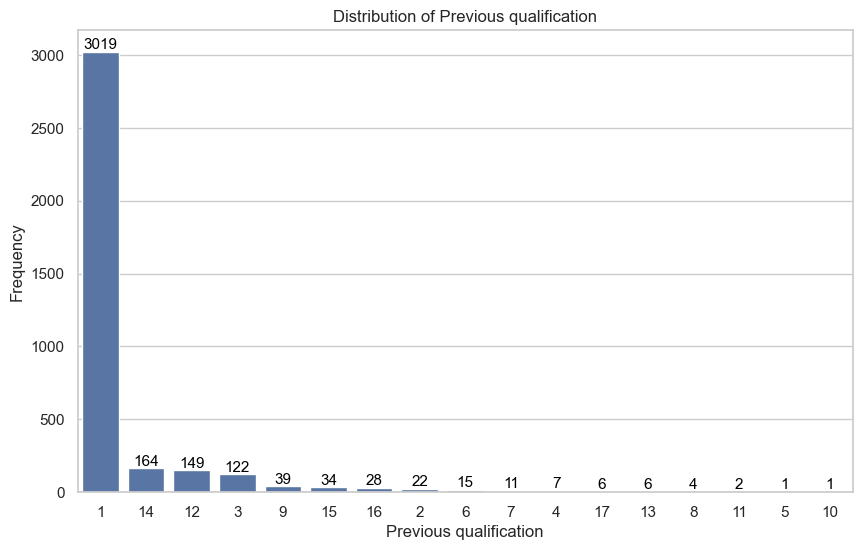

In [149]:
data = df['Previous qualification'].value_counts().reset_index()
data.columns = ['Previous qualification', 'Count']
data['Previous qualification'] = data['Previous qualification'].map({
    1: "Secondary education",
    2: "Higher education—bachelor’s degree",
    3: "Higher education—degree",
    4: "Higher education—master’s degree",
    5: "Higher education—doctorate",
    6: "Frequency of higher education",
    7: "12th year of schooling—not completed",
    8: "11th year of schooling—not completed",
    9: "Other—11th year of schooling",
    10: "10th year of schooling",
    11: "10th year of schooling—not completed",
    12: "Basic education 3rd cycle (9th/10th/11th year) or equivalent",
    13: "Basic education 2nd cycle (6th/7th/8th year) or equivalent",
    14: "Technological specialization course",
    15: "Higher education—degree (1st cycle)",
    16: "Professional higher technical course",
    17: "Higher education—master’s degree (2nd cycle)"
})
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Previous qualification', data=df, order=df['Previous qualification'].value_counts().index)
plt.title('Distribution of Previous qualification')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


              Nacionality  Count
0              Portuguese   3544
1               Brazilian     32
2            Cape Verdean     12
3               Santomean      9
4                 Spanish      8
5                 Guinean      5
6                 Italian      3
7               Ukrainian      3
8                 Mexican      2
9   Moldova (Republic of)      2
10                 German      2
11             Mozambican      1
12               Romanian      1
13                  Dutch      1
14              Colombian      1
15                Angolan      1
16                English      1
17             Lithuanian      1
18                Russian      1


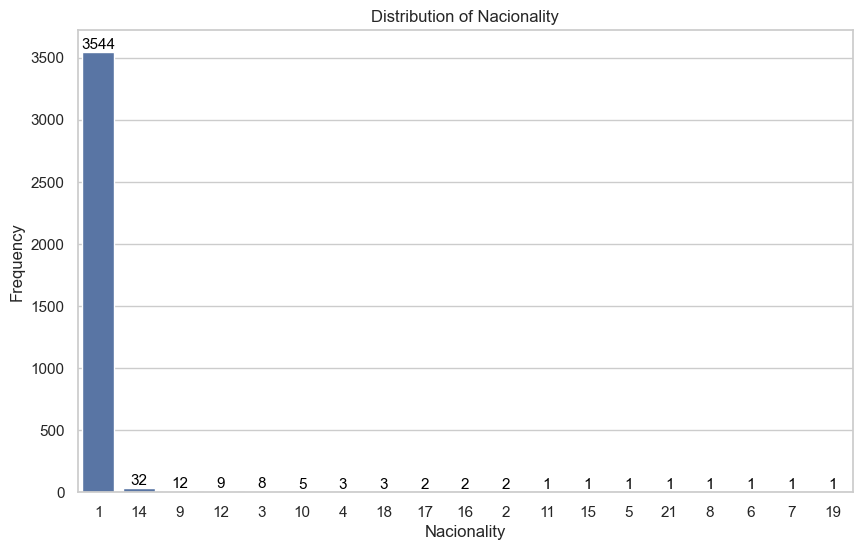

In [150]:
data = df['Nacionality'].value_counts().reset_index()
data.columns = ['Nacionality', 'Count']
data['Nacionality'] = data['Nacionality'].map({
    1: "Portuguese",
    2: "German",
    3: "Spanish",
    4: "Italian",
    5: "Dutch",
    6: "English",
    7: "Lithuanian",
    8: "Angolan",
    9: "Cape Verdean",
    10: "Guinean",
    11: "Mozambican",
    12: "Santomean",
    13: "Turkish",
    14: "Brazilian",
    15: "Romanian",
    16: "Moldova (Republic of)",
    17: "Mexican",
    18: "Ukrainian",
    19: "Russian",
    20: "Cuban",
    21: "Colombian"
})
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Nacionality', data=df, order=df['Nacionality'].value_counts().index)
plt.title('Distribution of Nacionality')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


                               Mother's qualification  Count
0   Secondary Education—12th Year of Schooling or ...    865
1       General Course of Administration and Commerce    840
2                             General commerce course    777
3         Supplementary Accounting and Administration    471
4                             Higher Education—degree    337
5         2nd cycle of the general high school course    127
6                  Higher Education—bachelor’s degree     60
7                        Other—11th Year of Schooling     39
8                    Higher Education—master’s degree     34
9                          Higher Education—doctorate     16
10                               Cannot read or write      8
11               12th Year of Schooling—not completed      8
12                                            Unknown      6
13    Can read without having a 4th year of schooling      6
14                      Frequency of Higher Education      4
15  Basic education 1st 

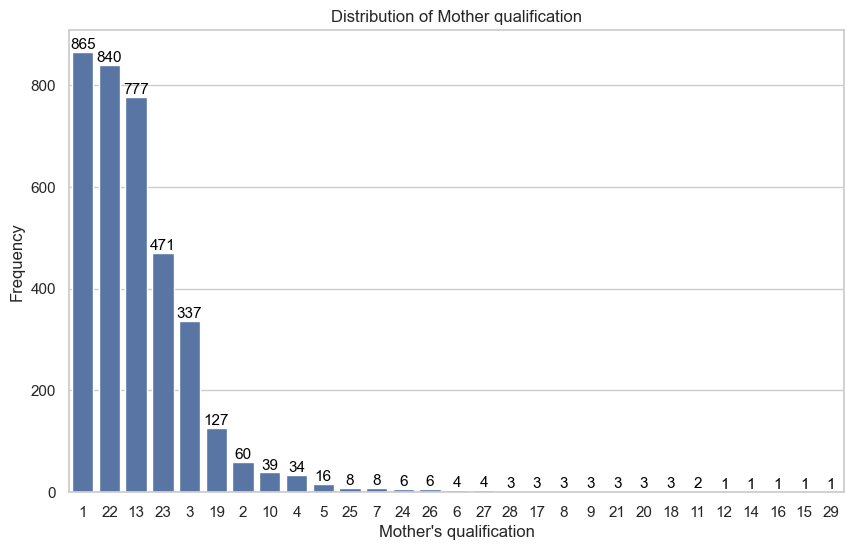

In [151]:
data = df["Mother's qualification"].value_counts().reset_index()
data.columns = ["Mother's qualification", 'Count']
data["Mother's qualification"] = data["Mother's qualification"].map(
    {
    1: "Secondary Education—12th Year of Schooling or Equivalent",
    2: "Higher Education—bachelor’s degree",
    3: "Higher Education—degree",
    4: "Higher Education—master’s degree",
    5: "Higher Education—doctorate",
    6: "Frequency of Higher Education",
    7: "12th Year of Schooling—not completed",
    8: "11th Year of Schooling—not completed",
    9: "7th Year (Old)",
    10: "Other—11th Year of Schooling",
    11: "2nd year complementary high school course",
    12: "10th Year of Schooling",
    13: "General commerce course",
    14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent",
    15: "Complementary High School Course",
    16: "Technical-professional course",
    17: "Complementary High School Course—not concluded",
    18: "7th year of schooling",
    19: "2nd cycle of the general high school course",
    20: "9th Year of Schooling—not completed",
    21: "8th year of schooling",
    22: "General Course of Administration and Commerce",
    23: "Supplementary Accounting and Administration",
    24: "Unknown",
    25: "Cannot read or write",
    26: "Can read without having a 4th year of schooling",
    27: "Basic education 1st cycle (4th/5th year) or equivalent",
    28: "Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent",
    29: "Technological specialization course",
    30: "Higher education—degree (1st cycle)",
    31: "Specialized higher studies course",
    32: "Professional higher technical course",
    33: "Higher Education—master’s degree (2nd cycle)",
    34: "Higher Education—doctorate (3rd cycle)"
}
)
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Mother's qualification", data=df, order=df["Mother's qualification"].value_counts().index)
plt.title('Distribution of Mother qualification')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


                               Father's qualification  Count
0   Basic education 1st cycle (4th/5th year) or eq...   1010
1   Basic Education 3rd Cycle (9th/10th/11th Year)...    785
2   Secondary Education—12th Year of Schooling or ...    732
3   Basic Education 2nd Cycle (6th/7th/8th Year) o...    575
4                             Higher Education—degree    220
5                                             Unknown    109
6                  Higher Education—bachelor’s degree     43
7                        Other—11th Year of Schooling     34
8                    Higher Education—master’s degree     32
9                          Higher Education—doctorate     15
10                Technological specialization course     13
11                                     7th Year (Old)     10
12    Can read without having a 4th year of schooling      8
13               12th Year of Schooling—not completed      5
14                Higher education—degree (1st cycle)      5
15                      

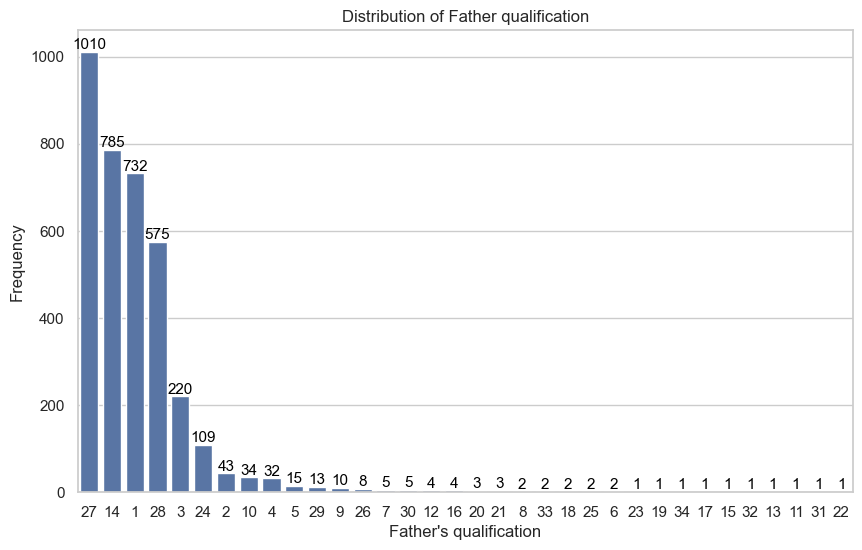

In [152]:
data = df["Father's qualification"].value_counts().reset_index()
data.columns = ["Father's qualification", 'Count']
data["Father's qualification"] = data["Father's qualification"].map(
    {
    1: "Secondary Education—12th Year of Schooling or Equivalent",
    2: "Higher Education—bachelor’s degree",
    3: "Higher Education—degree",
    4: "Higher Education—master’s degree",
    5: "Higher Education—doctorate",
    6: "Frequency of Higher Education",
    7: "12th Year of Schooling—not completed",
    8: "11th Year of Schooling—not completed",
    9: "7th Year (Old)",
    10: "Other—11th Year of Schooling",
    11: "2nd year complementary high school course",
    12: "10th Year of Schooling",
    13: "General commerce course",
    14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent",
    15: "Complementary High School Course",
    16: "Technical-professional course",
    17: "Complementary High School Course—not concluded",
    18: "7th year of schooling",
    19: "2nd cycle of the general high school course",
    20: "9th Year of Schooling—not completed",
    21: "8th year of schooling",
    22: "General Course of Administration and Commerce",
    23: "Supplementary Accounting and Administration",
    24: "Unknown",
    25: "Cannot read or write",
    26: "Can read without having a 4th year of schooling",
    27: "Basic education 1st cycle (4th/5th year) or equivalent",
    28: "Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent",
    29: "Technological specialization course",
    30: "Higher education—degree (1st cycle)",
    31: "Specialized higher studies course",
    32: "Professional higher technical course",
    33: "Higher Education—master’s degree (2nd cycle)",
    34: "Higher Education—doctorate (3rd cycle)"
}
)
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Father's qualification", data=df, order=df["Father's qualification"].value_counts().index)
plt.title('Distribution of Father qualification')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


                                  Mother's occupation  Count
0                                   Unskilled Workers   1313
1                                Administrative staff    670
2   Personal Services, Security and Safety Workers...    436
3      Intermediate Level Technicians and Professions    272
4   Specialists in Intellectual and Scientific Act...    240
5   Skilled Workers in Industry, Construction, and...    224
6                                             Student    143
7   Representatives of the Legislative Power and E...     87
8   Farmers and Skilled Workers in Agriculture, Fi...     77
9                                     Other Situation     70
10  Installation and Machine Operators and Assembl...     29
11                                            (blank)     15
12                 Other administrative support staff     15
13                             Armed Forces Sergeants      5
14                               Health professionals      4
15                 Perso

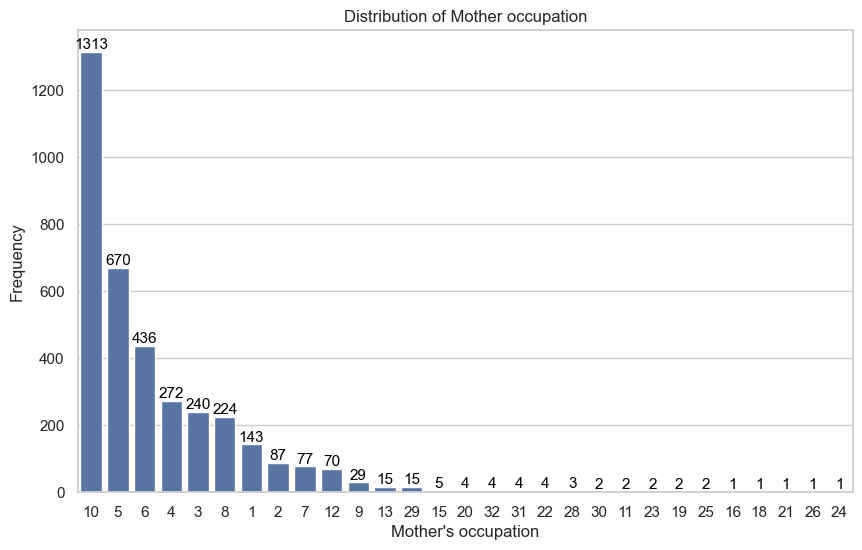

In [153]:
data = df["Mother's occupation"].value_counts().reset_index()
data.columns = ["Mother's occupation", 'Count']
data["Mother's occupation"] = data["Mother's occupation"].map(
    {
    1: "Student",
    2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    3: "Specialists in Intellectual and Scientific Activities",
    4: "Intermediate Level Technicians and Professions",
    5: "Administrative staff",
    6: "Personal Services, Security and Safety Workers, and Sellers",
    7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
    8: "Skilled Workers in Industry, Construction, and Craftsmen",
    9: "Installation and Machine Operators and Assembly Workers",
    10: "Unskilled Workers",
    11: "Armed Forces Professions",
    12: "Other Situation",
    13: "(blank)",
    14: "Armed Forces Officers",
    15: "Armed Forces Sergeants",
    16: "Other Armed Forces personnel",
    17: "Directors of administrative and commercial services",
    18: "Hotel, catering, trade, and other services directors",
    19: "Specialists in the physical sciences, mathematics, engineering, and related techniques",
    20: "Health professionals",
    21: "Teachers",
    22: "Specialists in finance, accounting, administrative organization, and public and commercial relations",
    23: "Intermediate level science and engineering technicians and professions",
    24: "Technicians and professionals of intermediate level of health",
    25: "Intermediate level technicians from legal, social, sports, cultural, and similar services",
    26: "Information and communication technology technicians",
    27: "Office workers, secretaries in general, and data processing operators",
    28: "Data, accounting, statistical, financial services, and registry-related operators",
    29: "Other administrative support staff",
    30: "Personal service workers",
    31: "Sellers",
    32: "Personal care workers and the like",
    33: "Protection and security services personnel",
    34: "Market-oriented farmers and skilled agricultural and animal production workers",
    35: "Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",
    36: "Skilled construction workers and the like, except electricians",
    37: "Skilled workers in metallurgy, metalworking, and similar",
    38: "Skilled workers in electricity and electronics",
    39: "Workers in food processing, woodworking, and clothing and other industries and crafts",
    40: "Fixed plant and machine operators",
    41: "Assembly workers",
    42: "Vehicle drivers and mobile equipment operators",
    43: "Unskilled workers in agriculture, animal production, and fisheries and forestry",
    44: "Unskilled workers in extractive industry, construction, manufacturing, and transport",
    45: "Meal preparation assistants",
    46: "Street vendors (except food) and street service providers"
}
)
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Mother's occupation", data=df, order=df["Mother's occupation"].value_counts().index)
plt.title('Distribution of Mother occupation')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


                                  Father's occupation  Count
0                                   Unskilled Workers    847
1   Skilled Workers in Industry, Construction, and...    555
2   Personal Services, Security and Safety Workers...    409
3      Intermediate Level Technicians and Professions    321
4                                Administrative staff    312
5   Installation and Machine Operators and Assembl...    263
6                            Armed Forces Professions    212
7   Farmers and Skilled Workers in Agriculture, Fi...    194
8   Specialists in Intellectual and Scientific Act...    147
9                                             Student    125
10  Representatives of the Legislative Power and E...    111
11                                    Other Situation     65
12                                            (blank)     17
13  Unskilled workers in extractive industry, cons...      7
14                 Other administrative support staff      5
15  Unskilled workers in

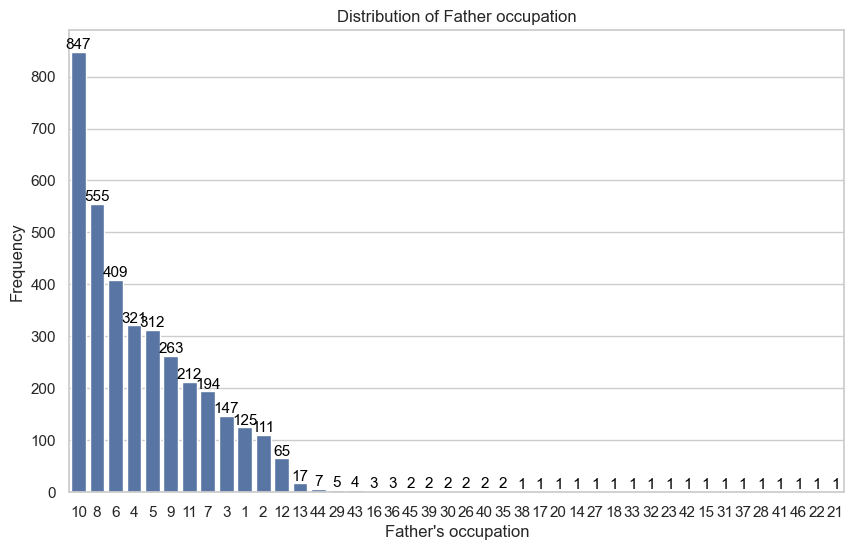

In [154]:
data = df["Father's occupation"].value_counts().reset_index()
data.columns = ["Father's occupation", 'Count']
data["Father's occupation"] = data["Father's occupation"].map(
    {
    1: "Student",
    2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    3: "Specialists in Intellectual and Scientific Activities",
    4: "Intermediate Level Technicians and Professions",
    5: "Administrative staff",
    6: "Personal Services, Security and Safety Workers, and Sellers",
    7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
    8: "Skilled Workers in Industry, Construction, and Craftsmen",
    9: "Installation and Machine Operators and Assembly Workers",
    10: "Unskilled Workers",
    11: "Armed Forces Professions",
    12: "Other Situation",
    13: "(blank)",
    14: "Armed Forces Officers",
    15: "Armed Forces Sergeants",
    16: "Other Armed Forces personnel",
    17: "Directors of administrative and commercial services",
    18: "Hotel, catering, trade, and other services directors",
    19: "Specialists in the physical sciences, mathematics, engineering, and related techniques",
    20: "Health professionals",
    21: "Teachers",
    22: "Specialists in finance, accounting, administrative organization, and public and commercial relations",
    23: "Intermediate level science and engineering technicians and professions",
    24: "Technicians and professionals of intermediate level of health",
    25: "Intermediate level technicians from legal, social, sports, cultural, and similar services",
    26: "Information and communication technology technicians",
    27: "Office workers, secretaries in general, and data processing operators",
    28: "Data, accounting, statistical, financial services, and registry-related operators",
    29: "Other administrative support staff",
    30: "Personal service workers",
    31: "Sellers",
    32: "Personal care workers and the like",
    33: "Protection and security services personnel",
    34: "Market-oriented farmers and skilled agricultural and animal production workers",
    35: "Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",
    36: "Skilled construction workers and the like, except electricians",
    37: "Skilled workers in metallurgy, metalworking, and similar",
    38: "Skilled workers in electricity and electronics",
    39: "Workers in food processing, woodworking, and clothing and other industries and crafts",
    40: "Fixed plant and machine operators",
    41: "Assembly workers",
    42: "Vehicle drivers and mobile equipment operators",
    43: "Unskilled workers in agriculture, animal production, and fisheries and forestry",
    44: "Unskilled workers in extractive industry, construction, manufacturing, and transport",
    45: "Meal preparation assistants",
    46: "Street vendors (except food) and street service providers"
}
)
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Father's occupation", data=df, order=df["Father's occupation"].value_counts().index)
plt.title('Distribution of Father occupation')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

  Displaced  Count
0       Yes   1993
1        No   1637


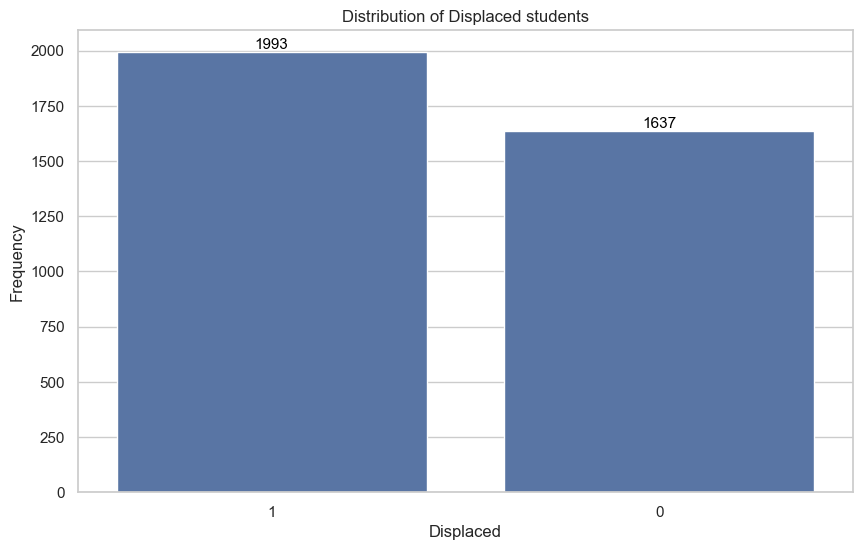

In [155]:
data = df
data = df['Displaced'].value_counts().reset_index()
data.columns = ['Displaced', 'Count']
data['Displaced'] = data['Displaced'].map({
    0: 'No',
    1: 'Yes'
})
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Displaced', data=df, order=df['Displaced'].value_counts().index)
plt.title('Distribution of Displaced students')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

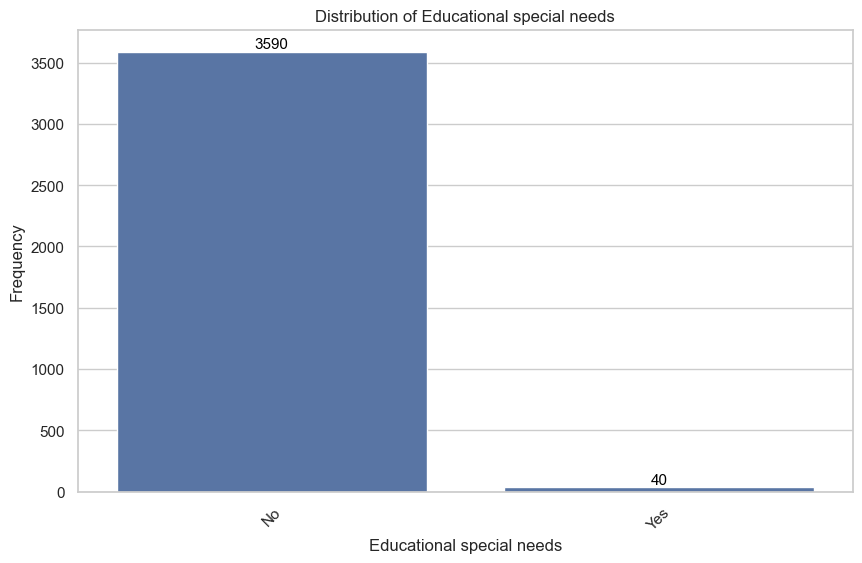

In [156]:
data = df
data['Educational special needs'] = df['Educational special needs'].map(
    {
    0: 'No',
    1: 'Yes'
    }
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Educational special needs', data=data, order=data['Educational special needs'].value_counts().index)
plt.title('Distribution of Educational special needs')
plt.xlabel('Educational special needs')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

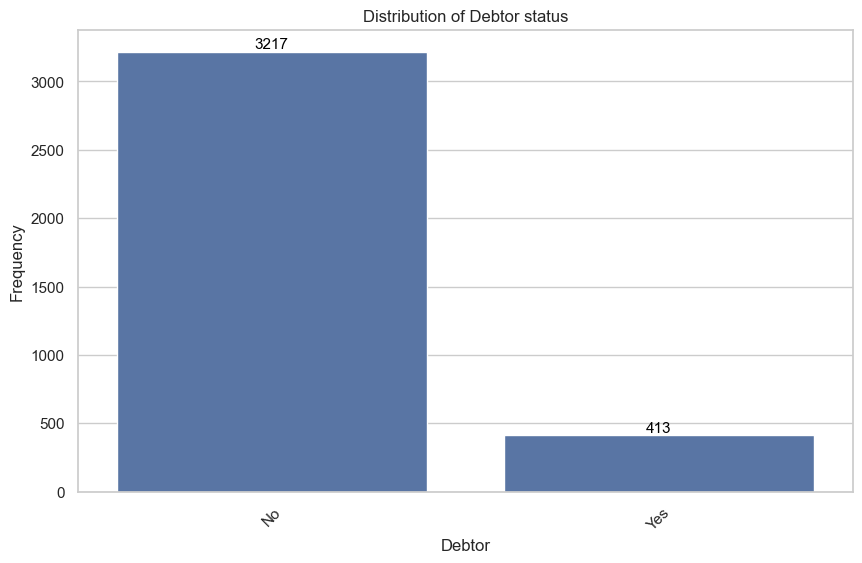

In [157]:
data = df
data['Debtor'] = df['Debtor'].map(
    {
    0: 'No',
    1: 'Yes'
    }
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Debtor', data=data, order=data['Debtor'].value_counts().index)
plt.title('Distribution of Debtor status')
plt.xlabel('Debtor')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

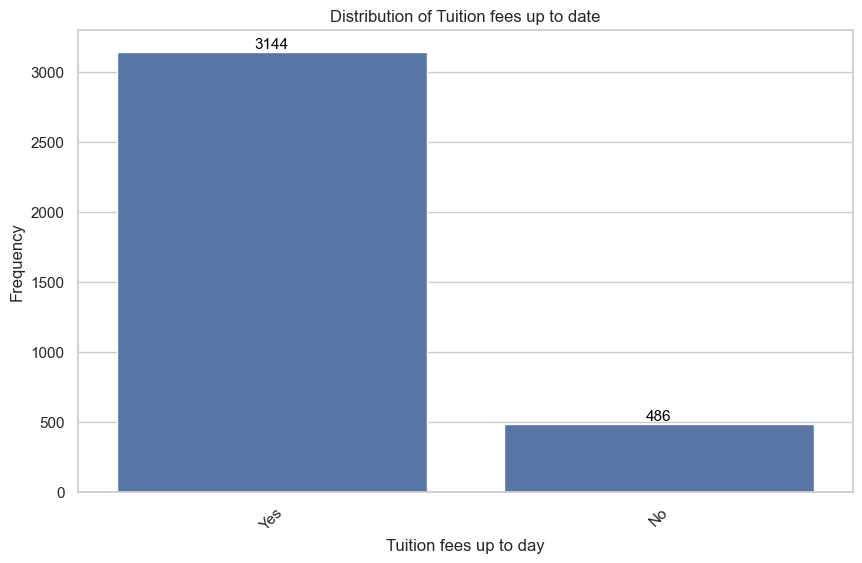

In [158]:
data = df
data['Tuition fees up to date'] = df['Tuition fees up to date'].map(
    {
    0: 'No',
    1: 'Yes'
    }
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Tuition fees up to date', data=data, order=data['Tuition fees up to date'].value_counts().index)
plt.title('Distribution of Tuition fees up to date')
plt.xlabel('Tuition fees up to day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

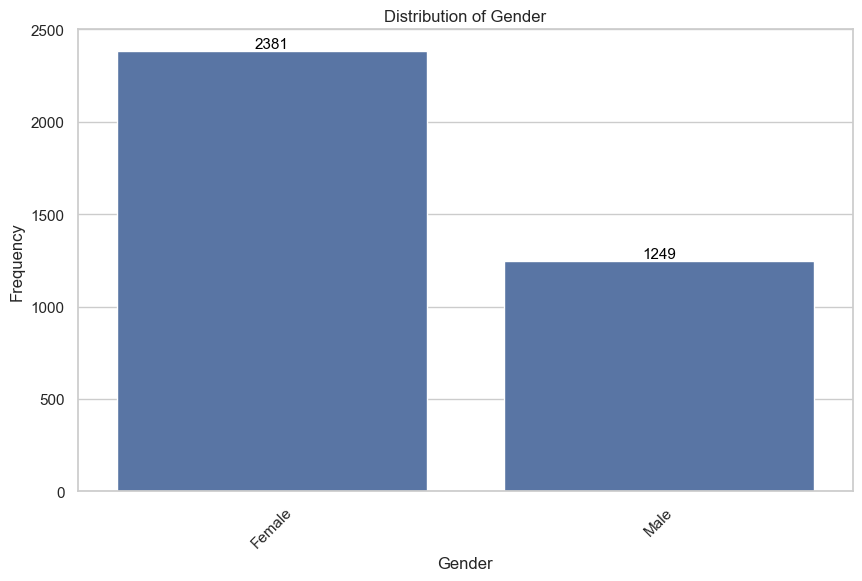

In [159]:
data = df
data['Gender'] = df['Gender'].map(
    {
    0: 'Female',
    1: 'Male'
    }
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=data, order=data['Gender'].value_counts().index)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

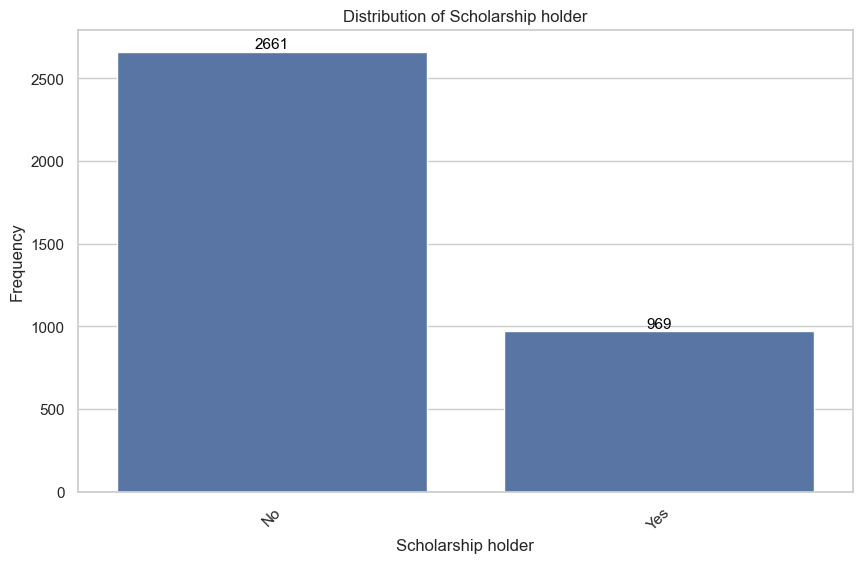

In [160]:
data = df
data['Scholarship holder'] = df['Scholarship holder'].map(
    {
    0: 'No',
    1: 'Yes'
    }
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Scholarship holder', data=data, order=data['Scholarship holder'].value_counts().index)
plt.title('Distribution of Scholarship holder')
plt.xlabel('Scholarship holder')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

    Age at enrollment  Count
0                  18    864
1                  19    754
2                  20    459
3                  21    252
4                  22    137
5                  24    101
6                  23     84
7                  27     79
8                  26     75
9                  25     72
10                 28     68
11                 29     61
12                 32     56
13                 34     48
14                 31     48
15                 35     44
16                 30     43
17                 37     37
18                 33     37
19                 39     33
20                 36     32
21                 41     26
22                 38     25
23                 43     22
24                 44     19
25                 40     19
26                 45     18
27                 47     16
28                 50     14
29                 49     12
30                 46     12
31                 42     11
32                 48      8
33            

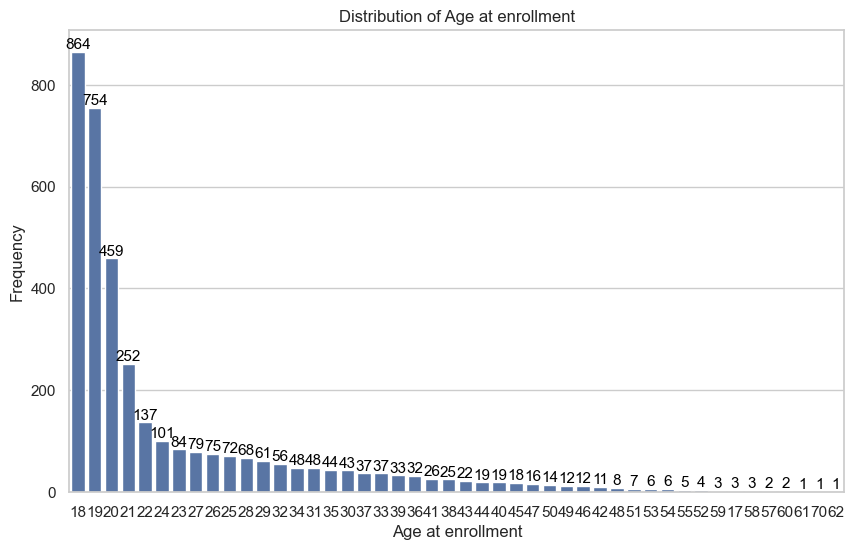

In [161]:
data = df['Age at enrollment'].value_counts().reset_index()
data.columns = ['Age at enrollment', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age at enrollment', data=df, order=df['Age at enrollment'].value_counts().index)
plt.title('Distribution of Age at enrollment')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


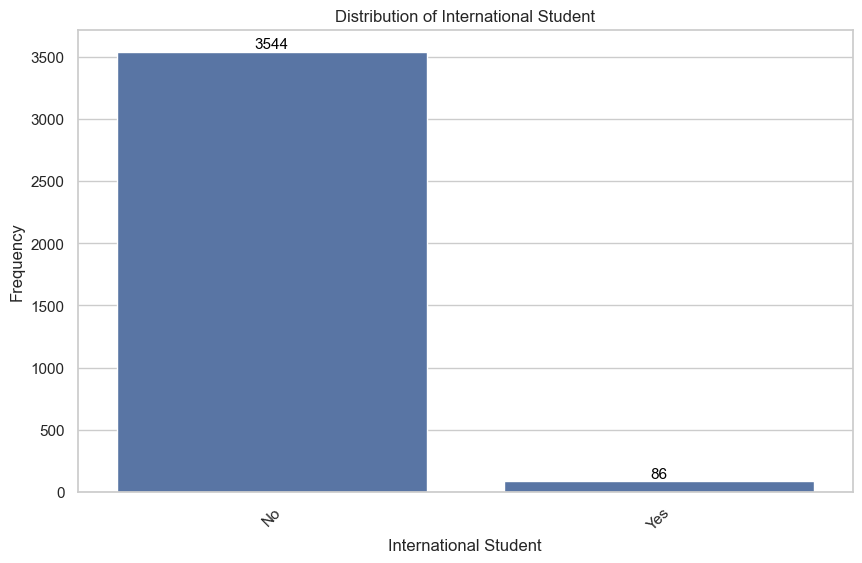

In [162]:
data = df
data['International'] = df['International'].map(
    {
    0: 'No',
    1: 'Yes'
    }
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='International', data=data, order=data['International'].value_counts().index)
plt.title('Distribution of International Student')
plt.xlabel('International Student')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

    Curricular units 1st sem (credited)  Count
0                                     0   3150
1                                     2     71
2                                     1     67
3                                     3     57
4                                     6     43
5                                     4     43
6                                     5     31
7                                     7     31
8                                     8     27
9                                     9     24
10                                   11     16
11                                   10     14
12                                   14     14
13                                   13     12
14                                   12     11
15                                   15      5
16                                   18      4
17                                   17      3
18                                   16      3
19                                   19      2
20           

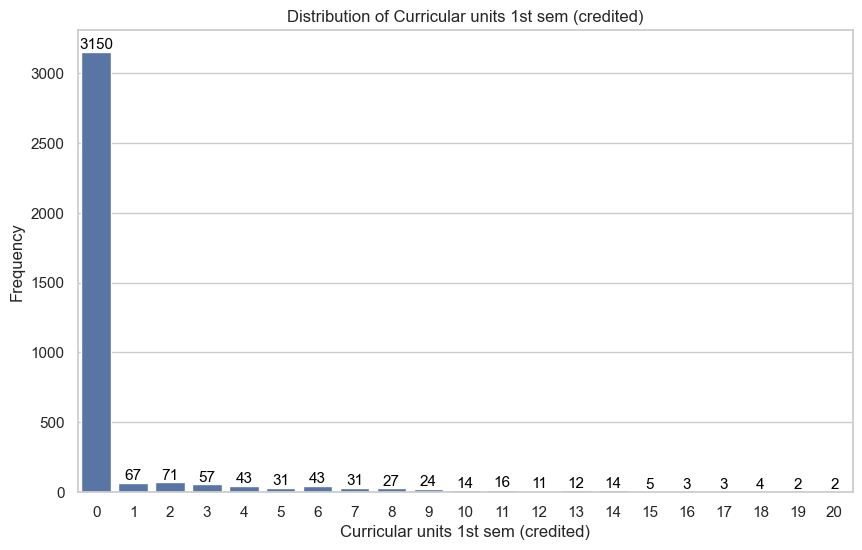

In [163]:

data = df['Curricular units 1st sem (credited)'].value_counts().reset_index()
data.columns = ['Curricular units 1st sem (credited)', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Curricular units 1st sem (credited)', data=df)
plt.title('Distribution of Curricular units 1st sem (credited)')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


    Curricular units 1st sem (enrolled)  Count
0                                     6   1594
1                                     5    749
2                                     7    546
3                                     8    264
4                                     0    152
5                                    12     54
6                                    10     43
7                                    11     37
8                                     9     31
9                                    15     24
10                                   14     22
11                                    4     21
12                                   18     19
13                                   13     16
14                                   17     13
15                                   16     12
16                                    3      9
17                                    2      7
18                                   21      6
19                                    1      6
20           

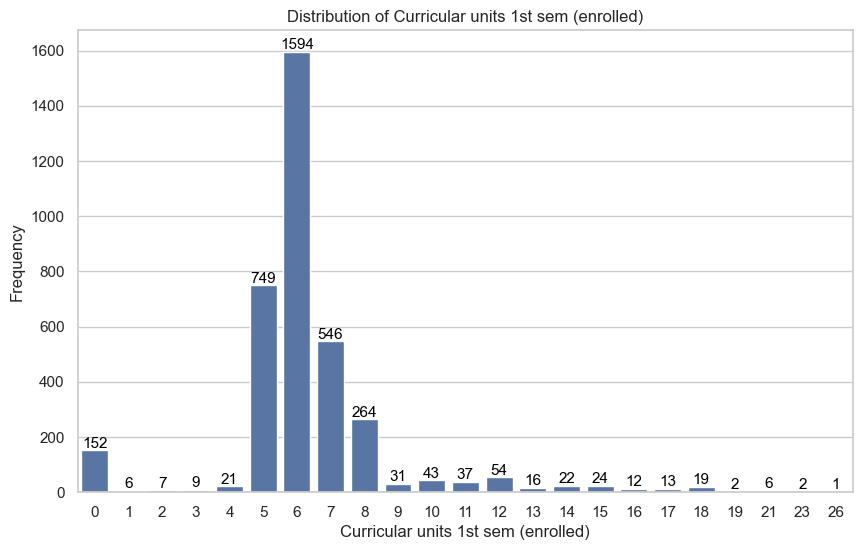

In [164]:

data = df['Curricular units 1st sem (enrolled)'].value_counts().reset_index()
data.columns = ['Curricular units 1st sem (enrolled)', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Curricular units 1st sem (enrolled)', data=df)
plt.title('Distribution of Curricular units 1st sem (enrolled)')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


    Curricular units 1st sem (evaluations)  Count
0                                        8    674
1                                        7    621
2                                        6    530
3                                        0    321
4                                        9    296
5                                       10    235
6                                        5    193
7                                       11    162
8                                       12    160
9                                       13    104
10                                      14     77
11                                      15     49
12                                      16     37
13                                      17     29
14                                      18     22
15                                      19     18
16                                       4     18
17                                      21     15
18                                      22     10


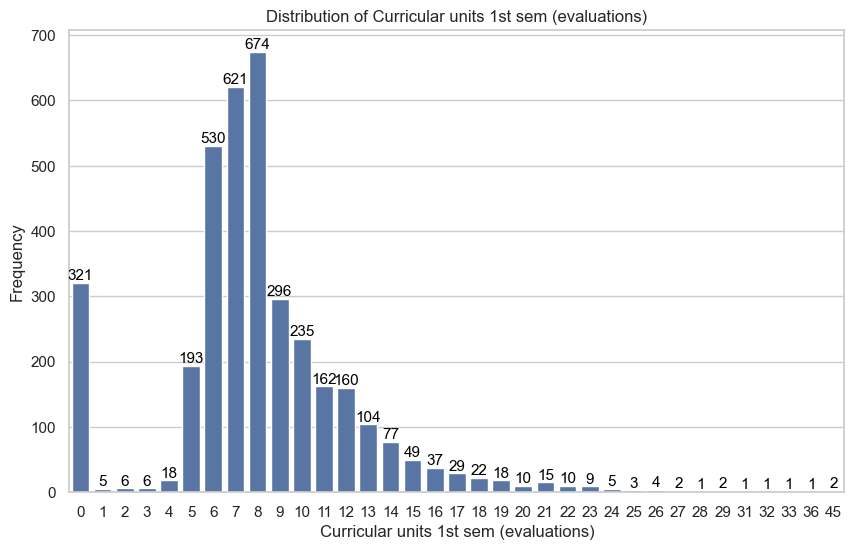

In [165]:

data = df['Curricular units 1st sem (evaluations)'].value_counts().reset_index()
data.columns = ['Curricular units 1st sem (evaluations)', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Curricular units 1st sem (evaluations)', data=df)
plt.title('Distribution of Curricular units 1st sem (evaluations)')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


    Curricular units 1st sem (approved)  Count
0                                     6   1033
1                                     0    647
2                                     5    530
3                                     7    429
4                                     4    288
5                                     3    176
6                                     2    118
7                                     1     94
8                                     8     94
9                                    11     42
10                                   12     40
11                                    9     35
12                                   13     23
13                                   10     21
14                                   18     15
15                                   14     14
16                                   17     10
17                                   15      6
18                                   16      5
19                                   21      4
20           

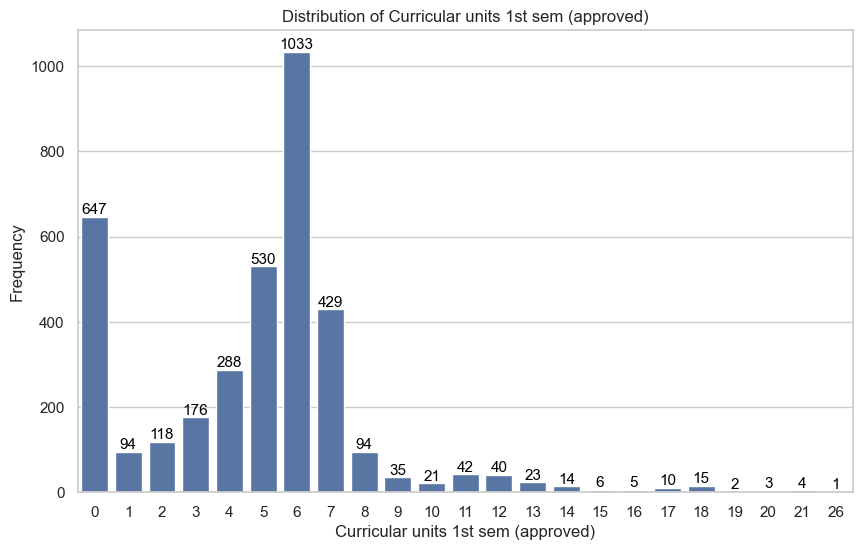

In [166]:

data = df['Curricular units 1st sem (approved)'].value_counts().reset_index()
data.columns = ['Curricular units 1st sem (approved)', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Curricular units 1st sem (approved)', data=df)
plt.title('Distribution of Curricular units 1st sem (approved)')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


    Curricular units 2nd sem (credited)  Count
0                                     0   3183
1                                     1     82
2                                     2     80
3                                     5     61
4                                     4     61
5                                     3     40
6                                     6     24
7                                    11     20
8                                     9     13
9                                    12     13
10                                    7     12
11                                   10     11
12                                    8     10
13                                   13      9
14                                   14      4
15                                   15      2
16                                   16      2
17                                   18      2
18                                   19      1


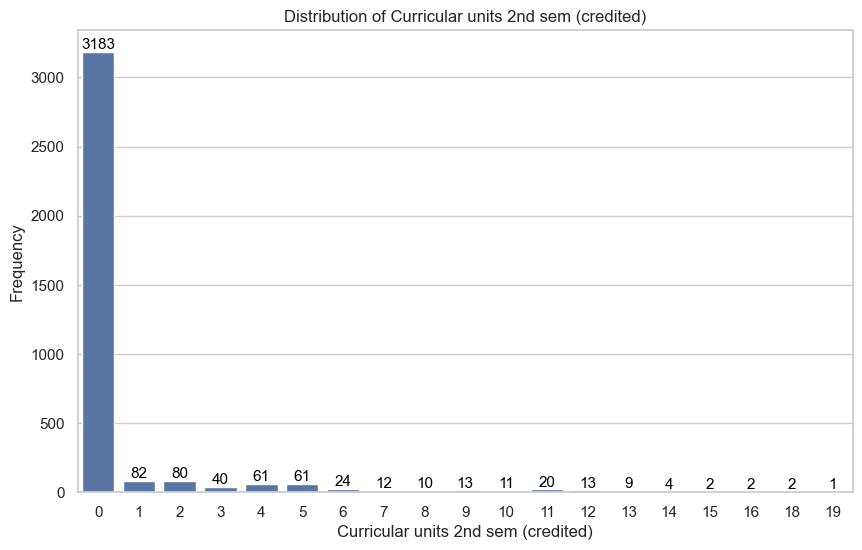

In [167]:
data = df['Curricular units 2nd sem (credited)'].value_counts().reset_index()
data.columns = ['Curricular units 2nd sem (credited)', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Curricular units 2nd sem (credited)', data=df)
plt.title('Distribution of Curricular units 2nd sem (credited)')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


    Curricular units 2nd sem (enrolled)  Count
0                                     6   1596
1                                     5    789
2                                     8    596
3                                     7    224
4                                     0    152
5                                    11     50
6                                     9     44
7                                    12     39
8                                    10     38
9                                    13     34
10                                   14     22
11                                    4     15
12                                   17     10
13                                    2      5
14                                    1      3
15                                   19      3
16                                    3      2
17                                   15      2
18                                   23      2
19                                   18      2
20           

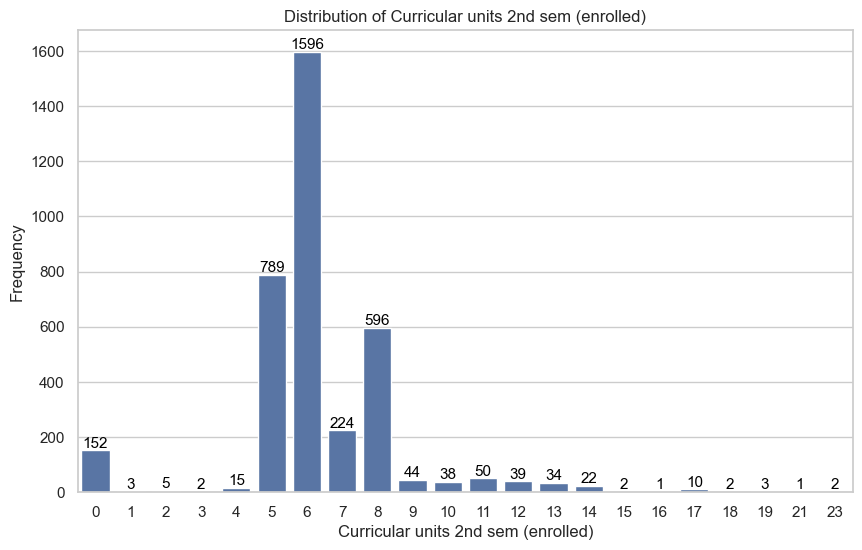

In [168]:
data = df['Curricular units 2nd sem (enrolled)'].value_counts().reset_index()
data.columns = ['Curricular units 2nd sem (enrolled)', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Curricular units 2nd sem (enrolled)', data=df)
plt.title('Distribution of Curricular units 2nd sem (enrolled)')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


    Curricular units 2nd sem (evaluations)  Count
0                                        8    654
1                                        6    556
2                                        7    478
3                                        0    372
4                                        9    353
5                                        5    268
6                                       10    257
7                                       11    181
8                                       12    150
9                                       13     98
10                                      14     77
11                                      15     53
12                                      16     36
13                                      18     18
14                                      17     15
15                                      19     11
16                                       4      8
17                                      21      8
18                                      22      8


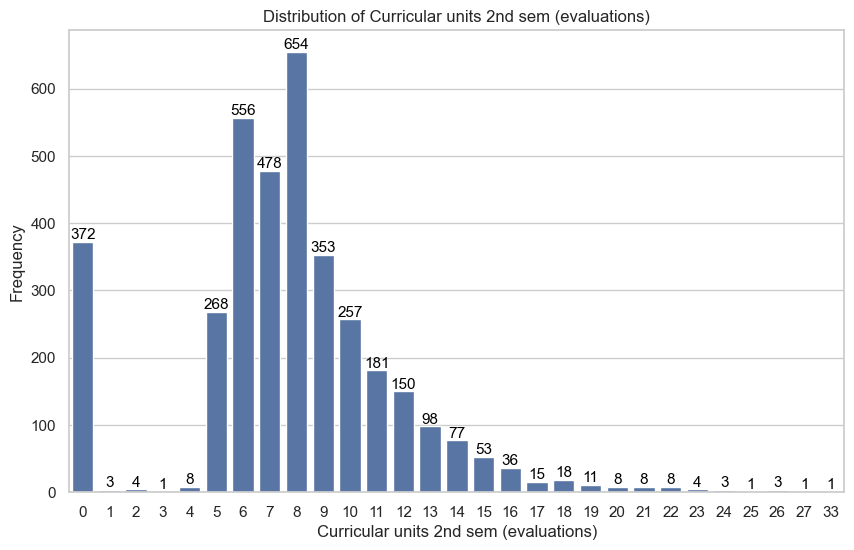

In [169]:
data = df['Curricular units 2nd sem (evaluations)'].value_counts().reset_index()
data.columns = ['Curricular units 2nd sem (evaluations)', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Curricular units 2nd sem (evaluations)', data=df)
plt.title('Distribution of Curricular units 2nd sem (evaluations)')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

    Curricular units 2nd sem (approved)  Count
0                                     6    867
1                                     0    802
2                                     5    569
3                                     8    306
4                                     7    287
5                                     4    254
6                                     3    161
7                                     2    121
8                                     1     86
9                                    11     44
10                                   12     32
11                                   10     32
12                                    9     25
13                                   13     21
14                                   17      8
15                                   14      6
16                                   19      3
17                                   20      2
18                                   16      2
19                                   18      2


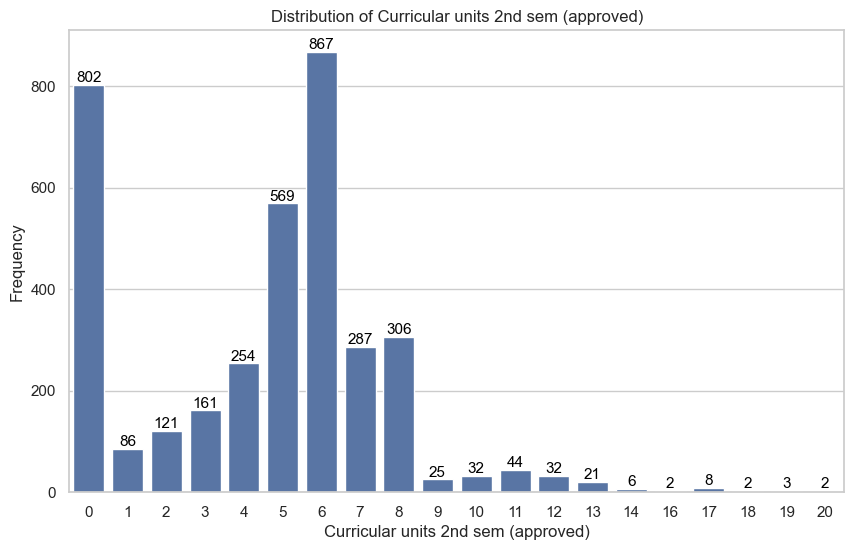

In [170]:
data = df['Curricular units 2nd sem (approved)'].value_counts().reset_index()
data.columns = ['Curricular units 2nd sem (approved)', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Curricular units 2nd sem (approved)', data=df)
plt.title('Distribution of Curricular units 2nd sem (approved)')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

   Unemployment rate  Count
0                7.6    452
1               10.8    435
2                9.4    424
3               12.7    356
4               12.4    355
5               11.1    347
6               15.5    328
7               13.9    326
8               16.2    316
9                8.9    291


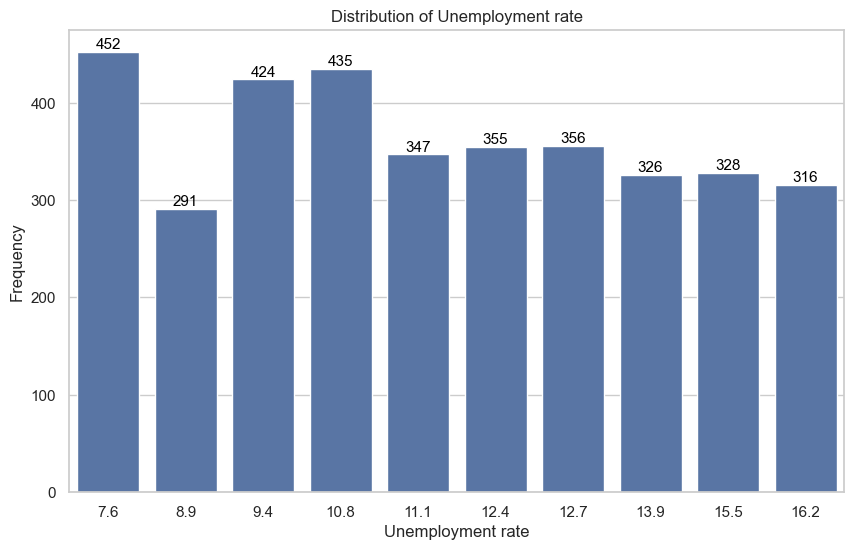

In [171]:
data = df['Unemployment rate'].value_counts().reset_index()
data.columns = ['Unemployment rate', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Unemployment rate', data=df)
plt.title('Distribution of Unemployment rate')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

   Inflation rate  Count
0             1.4    726
1             2.6    452
2            -0.8    424
3             3.7    356
4             0.5    355
5             0.6    347
6             2.8    328
7            -0.3    326
8             0.3    316


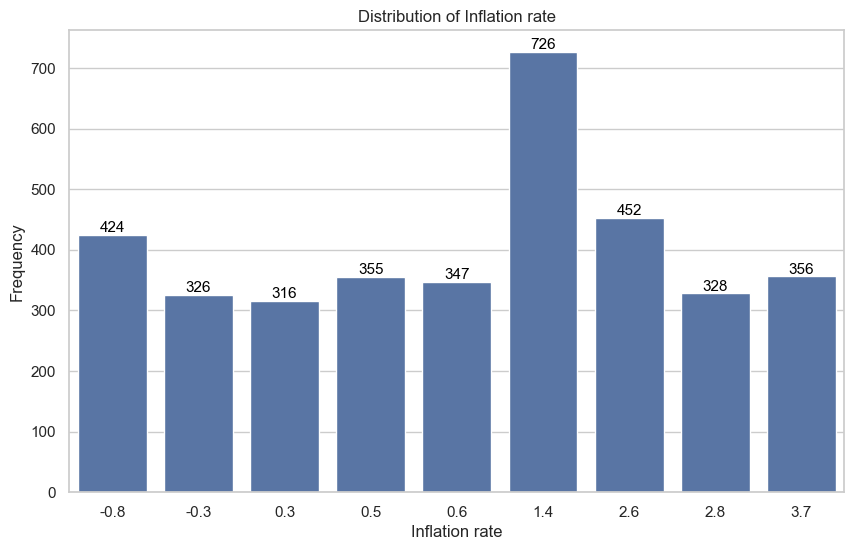

In [172]:
data = df['Inflation rate'].value_counts().reset_index()
data.columns = ['Inflation rate', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Inflation rate', data=df)
plt.title('Distribution of Inflation rate')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

    GDP  Count
0  0.32    452
1  1.74    435
2 -3.12    424
3 -1.70    356
4  1.79    355
5  2.02    347
6 -4.06    328
7  0.79    326
8 -0.92    316
9  3.51    291


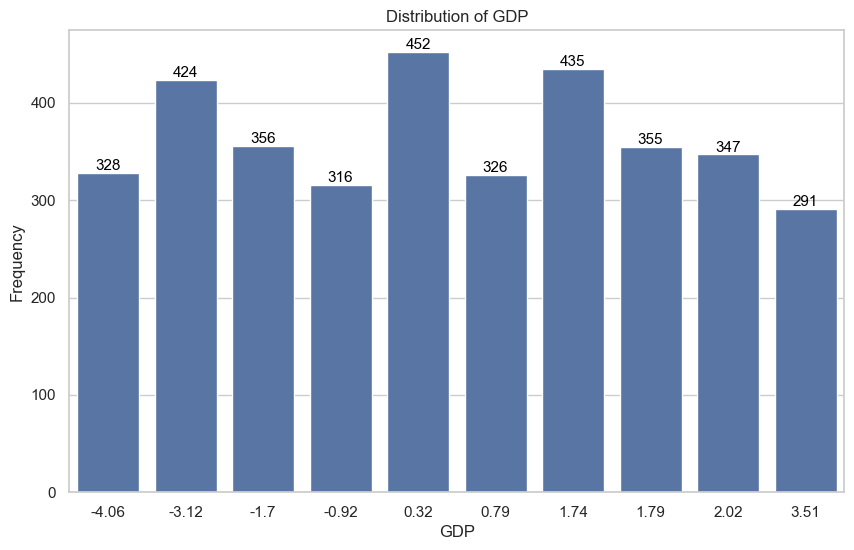

In [173]:
data = df['GDP'].value_counts().reset_index()
data.columns = ['GDP', 'Count']
print(data)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='GDP', data=df)
plt.title('Distribution of GDP')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### DATA CLEANING AND PREPARING FOR ML

In [174]:
students_df_cleaned['Target'].unique()


array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

- Dropout -> 0
- Graduate -> 1

In [175]:
students_df_cleaned

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [176]:
# students_df_cleaned['Target'] = students_df_cleaned['Target'].map({
#     'Dropout':0,
#     'Graduate':1,
# })

# Eliminar filas donde 'Target' es 'Enrolled'
students_df_cleaned = students_df_cleaned[students_df_cleaned['Target'] != 'Enrolled']

# Mapear valores de 'Target'
students_df_cleaned.loc[:, 'Target'] = students_df_cleaned['Target'].map({
    'Dropout': 0,
    'Graduate': 1
})

In [177]:
students_df_cleaned

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [178]:
import numpy as np
import pandas as pd

# Reemplazar valores no numéricos o faltantes por 5
students_df_cleaned['Target'] = students_df_cleaned['Target'].fillna(5).replace(['valor_no_numerico'], 5)

# Convertir la columna 'Target' a int64
students_df_cleaned['Target'] = students_df_cleaned['Target'].astype(np.int64)

# Verificar el tipo de datos
print(students_df_cleaned['Target'].dtypes)

int64


C:\Users\aeqv2\AppData\Local\Temp\ipykernel_17708\1792002182.py:5: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\aeqv2\AppData\Local\Temp\ipykernel_17708\1792002182.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aeqv2\AppData\Local\Temp\ipykernel_17708\1792002182.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [179]:
from sklearn.preprocessing import LabelEncoder

# Seleccionar las columnas categóricas
categorical_columns = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
                       'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
                       "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
                       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

data2 = students_df_cleaned.copy()

# Eliminar filas con 'Target' = 'Enrolled'
data2 = data2[data2['Target'] != 'Enrolled']

label_encoder = LabelEncoder()
for column in categorical_columns:
    data2[column] = label_encoder.fit_transform(data2[column])

# Separar características y variable objetivo
X = data2.drop('Target', axis=1)


### CLUSTERING

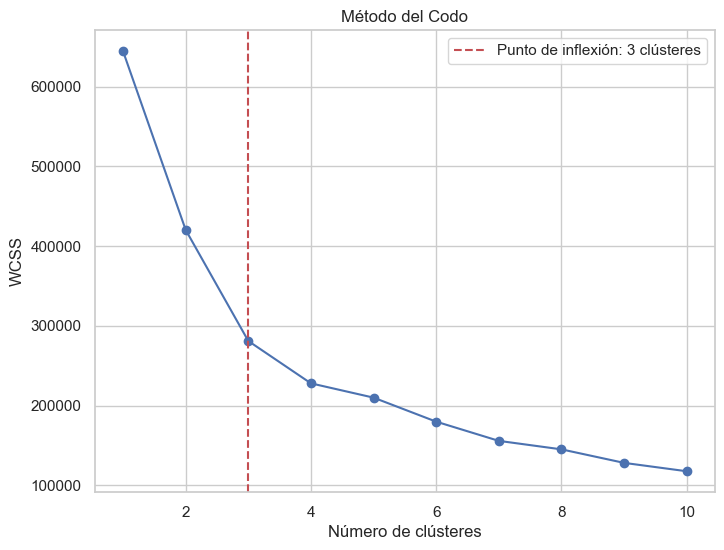

In [206]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Determinar el número óptimo de clústeres usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Calcular la segunda derivada de WCSS
segunda_derivada = [wcss[i+2] - 2*wcss[i+1] + wcss[i] for i in range(len(wcss)-2)]

# Encontrar el punto de inflexión (cambio más pronunciado)
punto_inflexion = argrelextrema(np.array(segunda_derivada), np.greater)[0][0] + 2

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.title('Método del Codo')

# Agregar la línea de corte en el punto de inflexión
plt.axvline(punto_inflexion, linestyle='--', color='r', label=f'Punto de inflexión: {punto_inflexion} clústeres')
plt.legend()
plt.show()

In [200]:
# Número óptimo de clústeres basado en el método del codo
n_clusters = 3  # Ajustar según el resultado del método del codo

# Aplicar K-Means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

# Agregar las etiquetas de clúster a los datos originales
data2['Cluster'] = labels

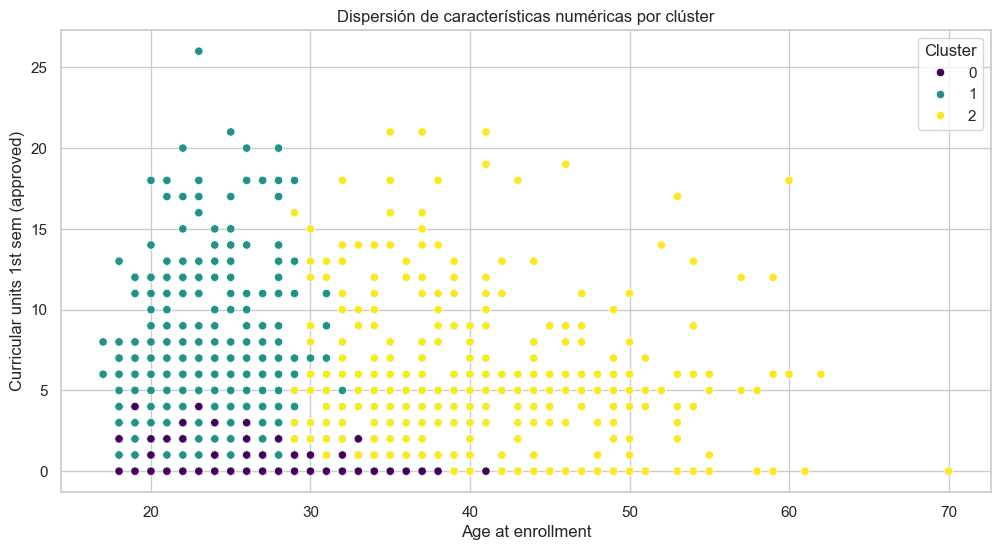

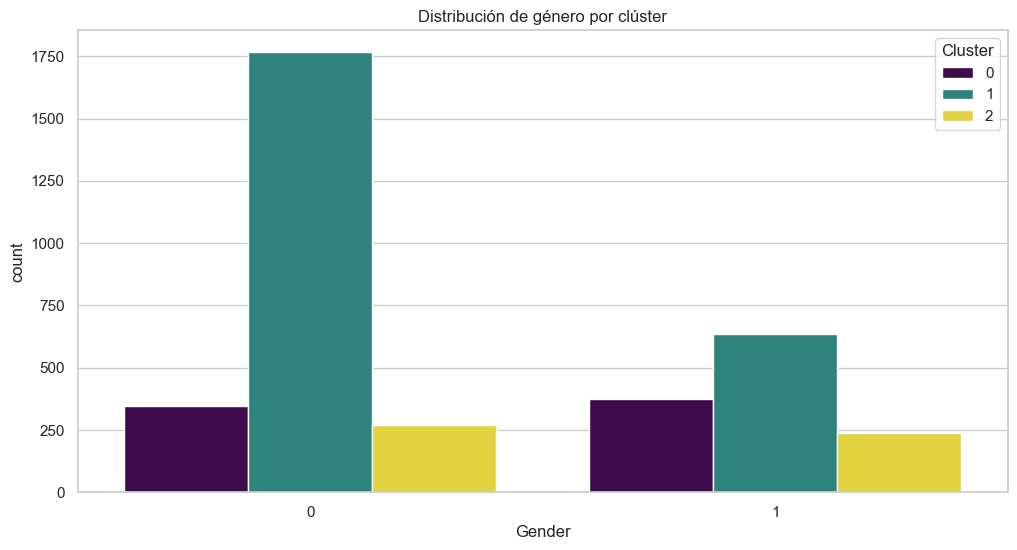

In [203]:
import seaborn as sns

# Gráfico de dispersión de características numéricas por clúster
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age at enrollment', y='Curricular units 1st sem (approved)', data=data2, hue='Cluster', palette='viridis')
plt.title('Dispersión de características numéricas por clúster')
plt.show()

# Gráfico de barras para variables categóricas por clúster
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Cluster', data=data2, palette='viridis')
plt.title('Distribución de género por clúster')
plt.show()



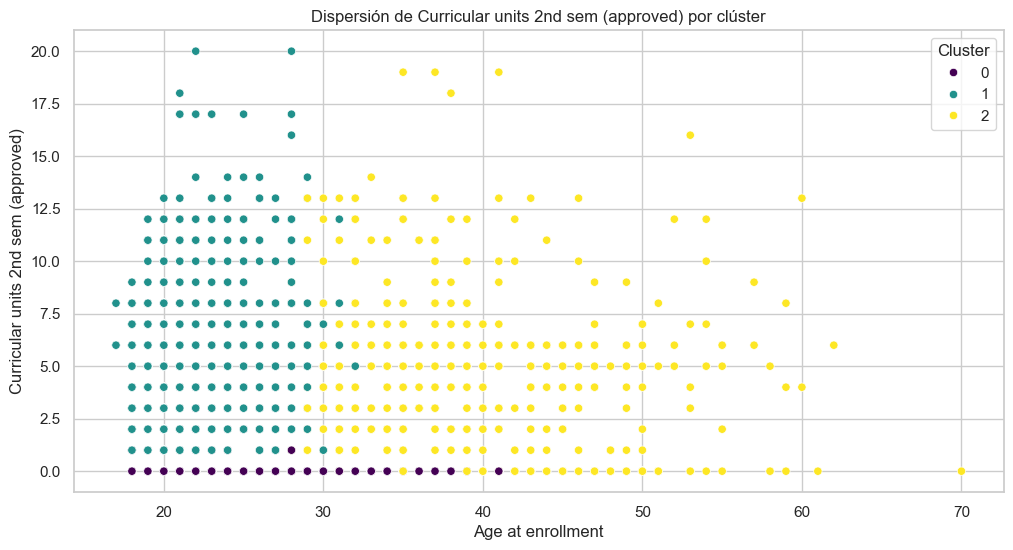

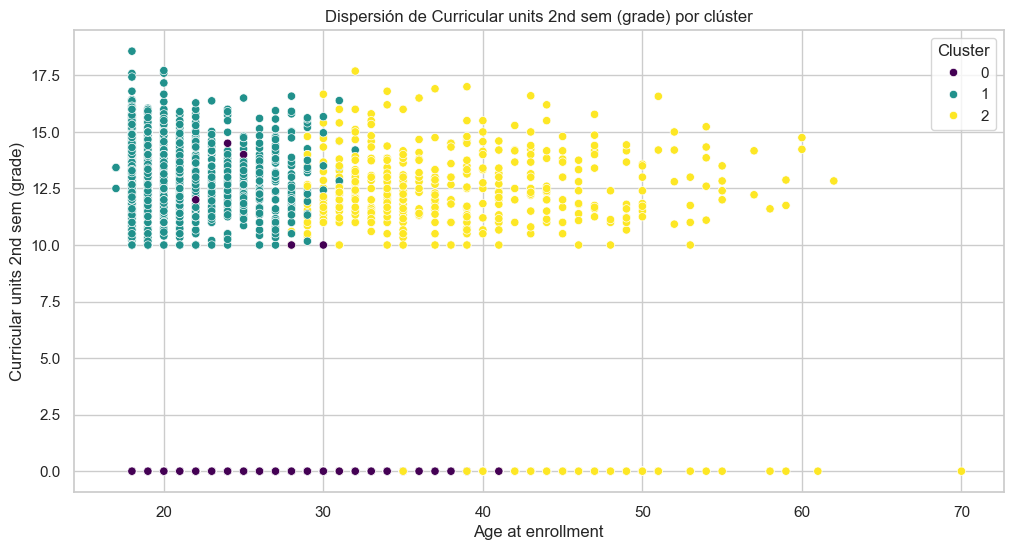

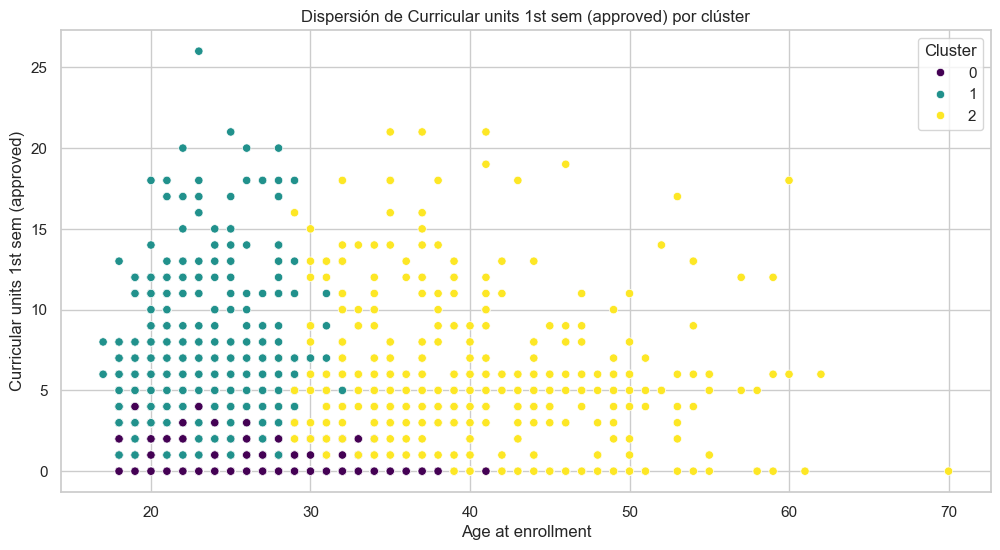

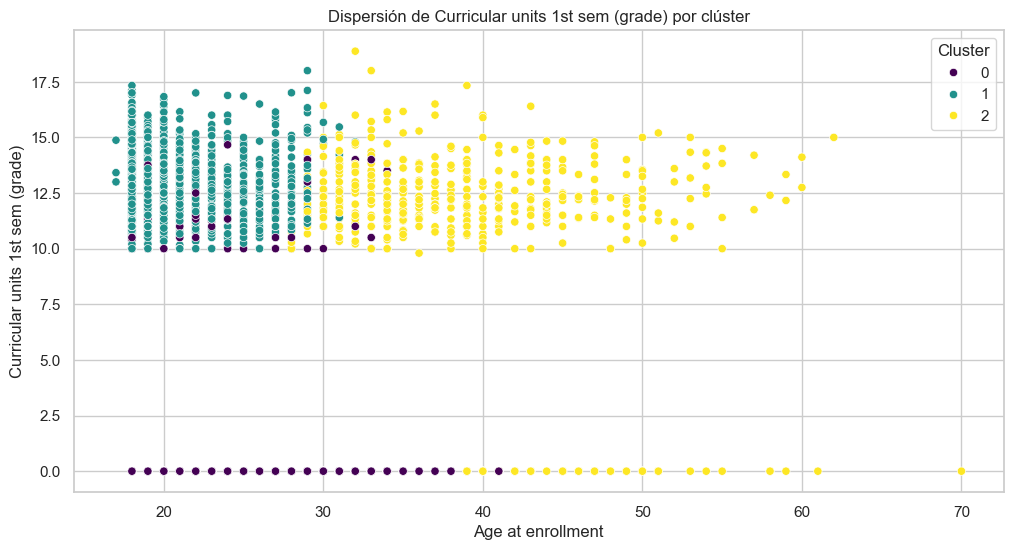

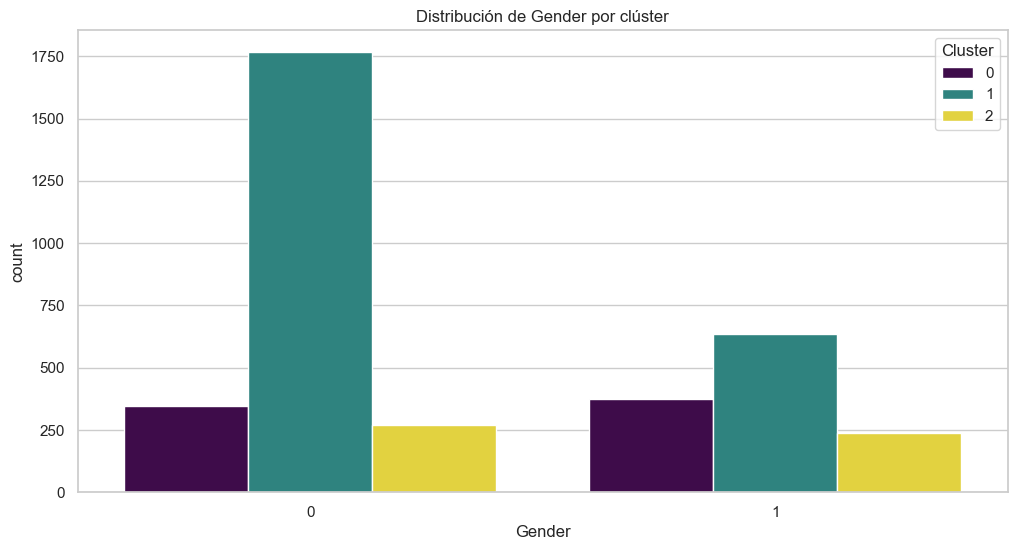

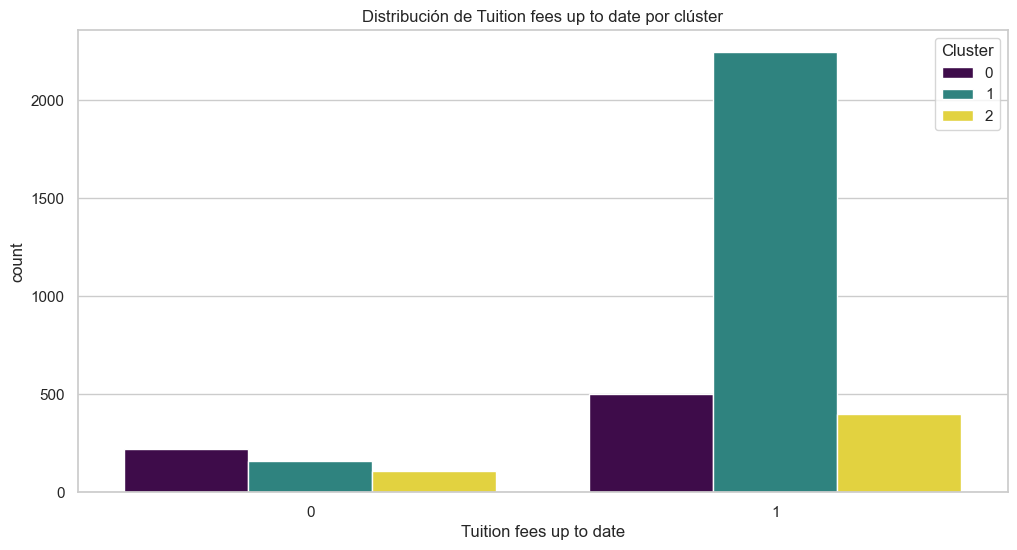

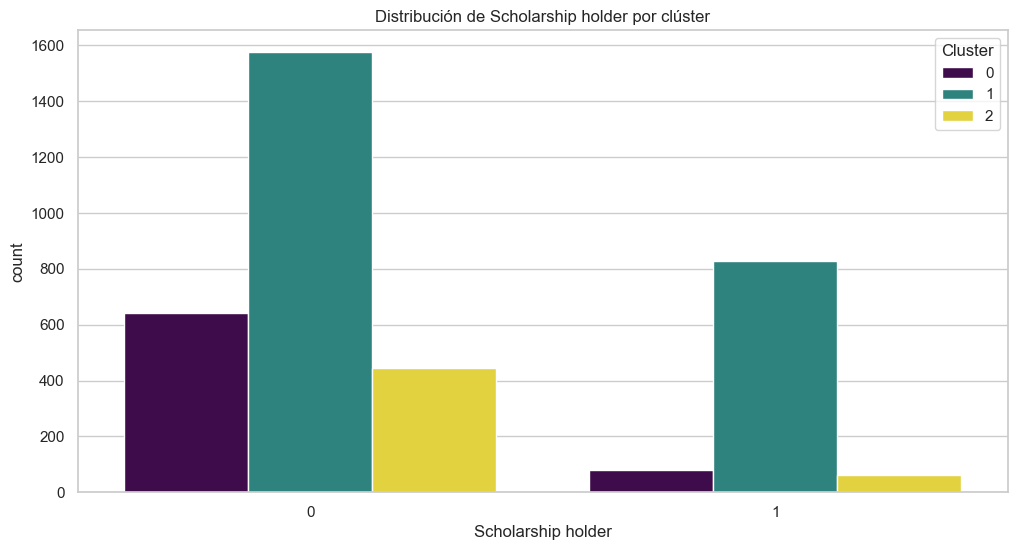

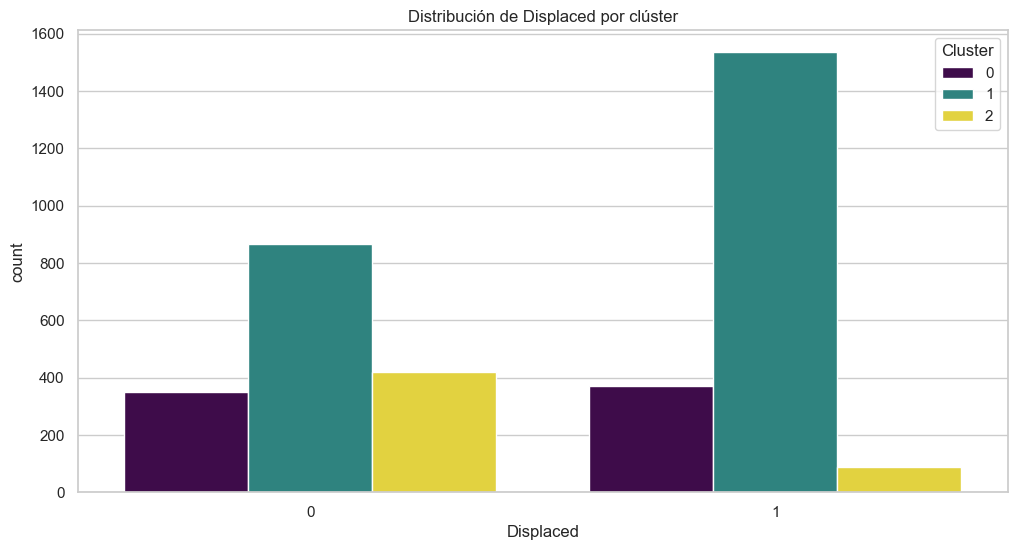

In [205]:
import seaborn as sns

# Variables con mayor correlación positiva
top_positive_cols = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
                     'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)']

# Gráfico de dispersión de variables numéricas por clúster
for col in top_positive_cols:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Age at enrollment', y=col, data=data2, hue='Cluster', palette='viridis')
    plt.title(f'Dispersión de {col} por clúster')
    plt.show()

# Gráfico de barras para variables categóricas por clúster
for col in ['Gender', 'Tuition fees up to date', 'Scholarship holder', 'Displaced']:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Cluster', data=data2, palette='viridis')
    plt.title(f'Distribución de {col} por clúster')
    plt.show()

## ENCODING

In [183]:
from sklearn.preprocessing import LabelEncoder

# Seleccionar las columnas categóricas
categorical_columns = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
                       'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
                       "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
                       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Aplicar Label Encoding a las variables categóricas
label_encoder = LabelEncoder()
for column in categorical_columns:
    students_df_cleaned.loc[:, column] = label_encoder.fit_transform(students_df_cleaned[column])

# Calcular la matriz de correlación
correlation_matrix = students_df_cleaned.corr()

# Obtener la correlación de la variable objetivo con las demás variables
target_correlation = correlation_matrix['Target'].sort_values(ascending=False)

# Imprimir las correlaciones
print("Correlación de la variable objetivo con las demás variables:")
print(target_correlation)

Correlación de la variable objetivo con las demás variables:
Target                                            1.000000
Curricular units 2nd sem (approved)               0.653995
Curricular units 2nd sem (grade)                  0.605350
Curricular units 1st sem (approved)               0.554881
Curricular units 1st sem (grade)                  0.519927
Tuition fees up to date                           0.442138
Scholarship holder                                0.313018
Curricular units 2nd sem (enrolled)               0.182897
Curricular units 1st sem (enrolled)               0.161074
Displaced                                         0.126113
Curricular units 2nd sem (evaluations)            0.119239
Application order                                 0.094355
Daytime/evening attendance                        0.084496
Father's occupation                               0.072048
Mother's occupation                               0.061564
Curricular units 1st sem (evaluations)            0.05

In [184]:
fig = px.imshow(students_df_cleaned)
fig.show()

1. El mapa de calor muestra la magnitud de los valores numéricos.
2. La relación de los colores con los valores (más oscuro = valor más bajo y viceversa).
3. Las columnas con valores más altos están relacionadas con la edad de las persinas al inscribirse (+40 años).
4. El propósito general de visualizar rápidamente las características numéricas más prominentes del conjunto de datos.

In [185]:
target_counts = students_df_cleaned['Target'].value_counts()
print(target_counts)

Target
1    2209
0    1421
Name: count, dtype: int64


In [186]:
students_df_cleaned.describe()

Marital status  Application mode  Application order       Course  \
count     3630.000000       3630.000000        3630.000000  3630.000000   
mean         0.184298          5.810193           1.750138     8.935537   
std          0.613009          5.253618           1.333831     4.340715   
min          0.000000          0.000000           0.000000     0.000000   
25%          0.000000          0.000000           1.000000     5.000000   
50%          0.000000          7.000000           1.000000    10.000000   
75%          0.000000         11.000000           2.000000    12.000000   
max          5.000000         17.000000           6.000000    16.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 3630.000000             3630.000000  3630.000000   
mean                     0.887603                1.552617     0.230579   
std                      0.315897                3.952440     1.605653   
min                      0.000000                0.000000     0.000000   
25%                      1.000000                0.000000     0.000000   
50%                      1.000000                0.000000     0.000000   
75%                      1.000000                0.000000     0.000000   
max                      1.000000               16.000000    18.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             3630.000000             3630.000000          3630.000000   
mean                11.558678               15.663636             6.178237   
std                  9.006183               10.993025             3.532695   
min                  0.000000                0.000000             0.000000   
25%                  1.000000                2.000000             4.000000   
50%                 12.000000               13.000000             5.000000   
75%                 21.000000               26.000000             9.000000   
max                 28.000000               33.000000            28.000000   

       ...  Curricular units 2nd sem (credited)  \
count  ...                          3630.000000   
mean   ...                             0.581818   
std    ...                             2.022688   
min    ...                             0.000000   
25%    ...                             0.000000   
50%    ...                             0.000000   
75%    ...                             0.000000   
max    ...                            19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          3630.000000   
mean                              6.296419   
std                               2.263020   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             3630.000000   
mean                                 7.763085   
std                                  3.964163   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          3630.000000                       3630.000000   
mean                              4.518457                         10.036155   
std                               3.162376                          5.481742   
min                               0.000000                          0.000000   
25%                               2.000000                         10.517857   
50%                               5.000000                         12.333333   
75%                               6.000000                         13.500000   
max 

### Correlación de la variable objetivo con las demás variables

1. Las variables con la correlación positiva más fuerte con la variable objetivo (Target) estan relacionadas con el rendimiento académico, como **"Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)", "Curricular units 1st sem (approved)" y "Curricular units 1st sem (grade)".** Esto sugiere que el rendimiento académico en el primer y segundo semestre tiene una influencia significativa en la probabilidad de graduación.

2. La variable **"Tuition fees up to date"** tiene una correlación positiva moderada (0.442138) con la variable objetivo. Esto indica que los estudiantes que mantienen sus tarifas de matrícula al día tienen una mayor probabilidad de graduarse en comparación con aquellos que no lo hacen.

3. Las variables **"Scholarship holder" y "Displaced"** mantienen una correlación positiva moderada y débil, respectivamente, con la variable objetivo, lo que sugiere que los estudiantes que reciben becas y los estudiantes desplazados tienen una mayor tendencia a graduarse.

4. Las variables relacionadas con la inscripción y evaluación de unidades curriculares en el primer y segundo semestre, como **"Curricular units 2nd sem (enrolled)", "Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (evaluations)" y "Curricular units 1st sem (evaluations)",** tienen una correlación positiva débil con la variable objetivo.

5. Las variables **"Application mode", "Debtor" y "Age at enrollment"** tienen una correlación negativa moderada con la variable objetivo. Esto sugiere que ciertas modalidades de solicitud, el estado de deudor y una edad mayor al momento de la inscripción están asociados con una menor probabilidad de graduación.

6. La variable **"Gender"** también muestra una correlación negativa moderada (-0.251955) con la variable objetivo, lo que indica que puede haber diferencias en la probabilidad de graduación entre géneros.

7. Otras variables, como **"Marital status", "Father's occupation", "Mother's occupation", "Course", "Nacionality", "Father's qualification" y "Mother's qualification",** tienen correlaciones relativamente bajas con la variable objetivo, lo que sugiere que pueden tener una influencia limitada en la probabilidad de graduación.


In [187]:
students_df_cleaned = students_df_cleaned.iloc[:,[1,11,13,14,15,16,17,20,22,23,26,28,29,34]]

In [188]:
students_df_cleaned.head()

Application mode  Displaced  Debtor  Tuition fees up to date  Gender  \
0                 7          1       0                        1       1   
1                 5          1       0                        0       1   
2                 0          1       0                        0       1   
3                 7          1       0                        1       0   
4                11          0       0                        1       0   

   Scholarship holder  Age at enrollment  Curricular units 1st sem (enrolled)  \
0                   0                 20                                    0   
1                   0                 19                                    6   
2                   0                 19                                    6   
3                   0                 20                                    6   
4                   0                 45                                    6   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (approved)  \
0                                    0                                    0   
1                                    6                                    6   
2                                    6                                    0   
3                                    6                                    5   
4                                    6                                    6   

   Curricular units 2nd sem (grade)  Target  
0                          0.000000       0  
1                         13.666667       1  
2                          0.000000       0  
3                         12.400000       1  
4                         13.000000       1

In [189]:
students_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application mode                     3630 non-null   int64  
 1   Displaced                            3630 non-null   int64  
 2   Debtor                               3630 non-null   int64  
 3   Tuition fees up to date              3630 non-null   int64  
 4   Gender                               3630 non-null   int64  
 5   Scholarship holder                   3630 non-null   int64  
 6   Age at enrollment                    3630 non-null   int64  
 7   Curricular units 1st sem (enrolled)  3630 non-null   int64  
 8   Curricular units 1st sem (approved)  3630 non-null   int64  
 9   Curricular units 1st sem (grade)     3630 non-null   float64
 10  Curricular units 2nd sem (enrolled)  3630 non-null   int64  
 11  Curricular units 2nd sem (approved)

<Axes: >

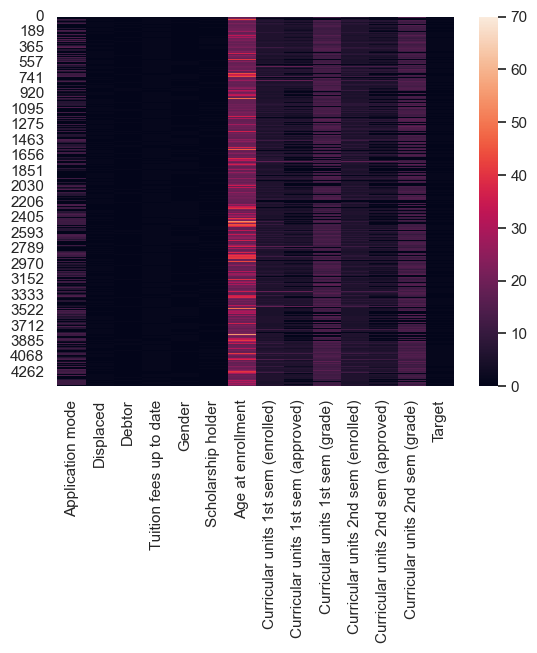

In [190]:
sns.heatmap(students_df_cleaned)

In [191]:
students_df_cleaned['Target'].value_counts()

Target
1    2209
0    1421
Name: count, dtype: int64

In [192]:
# Plot the above values
x = students_df_cleaned['Target'].value_counts().index
y = students_df_cleaned['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [193]:
fig = px.scatter(students_df_cleaned, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

In [194]:
fig = px.scatter(students_df_cleaned, 
             x = 'Curricular units 1st sem (grade)',
             y = 'Curricular units 2nd sem (grade)',
             color = 'Target')
fig.show()

#### Splitting the data into Training & Testing Data

In [195]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = students_df_cleaned.drop('Target', axis=1)
y = students_df_cleaned['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 13)
(726, 13)
(2904,)
(726,)
